In [1]:
import os
import sys
lib_path = os.path.abspath(os.path.join(os.path.abspath(''), 'functions/'))
sys.path.append(lib_path)
# need to append our functions dir to the path! 

import SD_raster_loading
import SD_NC_loading
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dalecLoad
import spectralConv
import seaborn as sns
import scipy as sp
from datetime import timedelta
import matplotlib.dates as mdates

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
pd.__version__

'2.0.3'

# Load SD data

- found that fit is a little better if I use the data from the slightly deeper part of the loch
- most points are approx the same, but some of the outliers work better!

In [3]:

#coord = [56.14693897799395, -3.923458784671348] # this is approx the location of the DALEC
coord = [56.146746528609306, -3.92285731543299] # this is perhaps a deeper part of the loch
sds_23 = SD_NC_loading.load_multiple_SDs('planetData/Airthrey-2023-Jul-Oct_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(20,20))

sds_22 = SD_NC_loading.load_multiple_SDs('planetData/Aithrey_2022_Apr-Sept_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(20,20))

sds_23_1 = SD_NC_loading.load_multiple_SDs('planetData/Aithrey2023-Apr-June_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(20,20))

date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 f

In [4]:
sds = pd.concat([sds_22.reset_index(), sds_23_1.reset_index(), sds_23.reset_index()], axis=0)
sds

,Date,Wavelength,rho_s_53_84,rho_s_53_85,rho_s_53_86,rho_s_53_87,rho_s_53_88,rho_s_53_89,rho_s_53_90,rho_s_53_91,...,rho_s_72_94,rho_s_72_95,rho_s_72_96,rho_s_72_97,rho_s_72_98,rho_s_72_99,rho_s_72_100,rho_s_72_101,rho_s_72_102,rho_s_72_103
0,2022-04-19 10:47:11+00:00,444.0,0.008818,0.007039,0.005948,0.006094,0.006879,0.007623,0.008738,0.008698,...,0.006453,0.006813,0.007915,0.008234,0.008115,0.00644,0.006267,0.006919,0.00761,0.004909
1,2022-04-19 10:47:11+00:00,492.0,0.005823,0.005518,0.005024,0.004942,0.005165,0.004155,0.00426,0.004695,...,0.00513,0.005177,0.005024,0.004872,0.00466,0.00446,0.004308,0.00399,0.004155,0.004872
2,2022-04-19 10:47:11+00:00,533.0,0.005353,0.005401,0.005935,0.006093,0.005438,0.004733,0.004928,0.005401,...,0.005353,0.005486,0.005547,0.005389,0.005316,0.00534,0.00534,0.005377,0.005462,0.005474
3,2022-04-19 10:47:11+00:00,566.0,0.007951,0.007584,0.007706,0.00751,0.007547,0.007302,0.007571,0.007535,...,0.008196,0.007584,0.007951,0.007829,0.007718,0.007706,0.007277,0.007179,0.007608,0.00871
4,2022-04-19 10:47:11+00:00,612.0,0.007515,0.007184,0.008252,0.008303,0.007693,0.007451,0.007476,0.007744,...,0.006509,0.006636,0.006891,0.0067,0.006535,0.006598,0.007082,0.006955,0.006827,0.007209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2023-10-11 10:31:23+00:00,566.0,0.007727,0.00722,0.006694,0.007238,0.007689,0.008402,0.009172,0.009022,...,0.00767,0.007069,0.007107,0.007032,0.00675,0.007332,0.00737,0.00752,0.008177,0.007314
220,2023-10-11 10:31:23+00:00,612.0,0.008185,0.007754,0.007067,0.006205,0.006734,0.006852,0.006734,0.00791,...,0.006283,0.007518,0.007773,0.007714,0.007342,0.007028,0.007126,0.007048,0.006616,0.006146
221,2023-10-11 10:31:23+00:00,666.0,0.006569,0.00635,0.005831,0.005771,0.00639,0.006031,0.005552,0.005512,...,0.005731,0.005911,0.006131,0.00647,0.00649,0.006111,0.00625,0.006111,0.005791,0.00641
222,2023-10-11 10:31:23+00:00,707.0,0.008906,0.009523,0.009438,0.008906,0.007799,0.008246,0.008714,0.00931,...,0.008246,0.007309,0.007458,0.007799,0.008906,0.008885,0.008437,0.008778,0.008331,0.007564


# Load only clean data
Interestingly, this doesn't really affect the results. If anything, including data with haze, shadows etc. improves the fit of regression graphs as we get more data points!

Might be an idea to do a slightly more loose cleaning of the planet images - maybe shadows are fine?
Or I could include a flag column in the data and see if any particular types of error are causing issues?

- I think the blues will be most badly affected by haze, but we're not using these anyway
- I think shadow might not be such a big issue
- I'm not sure why some images appear blurry, but maybe these also aren't an issue...



In [5]:
# load list of good files from data review csv...
good_df = pd.read_csv('planetData/good_data_review.csv')
extra_good = good_df.copy()
# select everything except images with cloud cover
extra_good = good_df.copy()[good_df['flag'] != 'cloud']
# uncomment this line for selection of only 'good' images
#extra_good = good_df.copy()[good_df['atmospheric interference at measurement points'] == 'good']

good_files = []
for f in extra_good.filename:
    #good_files.append(f[1:5] + '_' + f[5:7] + '_' + f[7:9] + '_' + f[10:12]+ '_' + f[12:14]+ '_' + f[14:16])
    good_files.append(f[1:16])

good_dates = pd.to_datetime(good_files, format='%Y%m%d_%H%M%S', utc=True)
# remove bad dates
sds = sds[sds.Date.isin(good_dates)]

In [6]:
extra_good.filename[0][20:24]

'2429'

In [7]:
extra_good['Date'] = good_dates
extra_good['Sat_ID'] = [f[20:24] for f in extra_good.filename]
extra_good[['Date', 'Sat_ID', 'flag']]

,Date,Sat_ID,flag
0,2022-09-24 10:27:33+00:00,2429,good
1,2022-09-14 10:23:16+00:00,2448,good
2,2022-04-19 10:47:11+00:00,2276,good
3,2022-09-10 11:04:21+00:00,249c,good
4,2022-09-14 10:23:14+00:00,2448,good
...,...,...,...
105,2023-06-02 10:28:55+00:00,24c9,good
106,2023-05-30 10:20:20+00:00,2459,good
107,2023-04-15 10:24:33+00:00,2465,good
108,2023-04-15 10:24:30+00:00,2465,good


In [8]:
sds = sds.merge(extra_good[['Date', 'Sat_ID', 'flag']], on='Date')

In [9]:
sds['date'] = sds.Date.dt.date
sds.columns

Index(['Date', 'Wavelength', 'rho_s_53_84', 'rho_s_53_85', 'rho_s_53_86',
       'rho_s_53_87', 'rho_s_53_88', 'rho_s_53_89', 'rho_s_53_90',
       'rho_s_53_91',
       ...
       'rho_s_72_97', 'rho_s_72_98', 'rho_s_72_99', 'rho_s_72_100',
       'rho_s_72_101', 'rho_s_72_102', 'rho_s_72_103', 'Sat_ID', 'flag',
       'date'],
      dtype='object', length=405)

In [10]:
sds_melt = pd.melt(sds, id_vars=['Date', 'date', 'Wavelength', 'Sat_ID', 'flag'], var_name='location', value_name='Rrs')

In [11]:
sds_melt['Rrs'] =  sds_melt.Rrs.astype(float)

In [12]:
sds_melt

,Date,date,Wavelength,Sat_ID,flag,location,Rrs
0,2022-04-19 10:47:11+00:00,2022-04-19,444.0,2276,good,rho_s_53_84,0.008818
1,2022-04-19 10:47:11+00:00,2022-04-19,492.0,2276,good,rho_s_53_84,0.005823
2,2022-04-19 10:47:11+00:00,2022-04-19,533.0,2276,good,rho_s_53_84,0.005353
3,2022-04-19 10:47:11+00:00,2022-04-19,566.0,2276,good,rho_s_53_84,0.007951
4,2022-04-19 10:47:11+00:00,2022-04-19,612.0,2276,good,rho_s_53_84,0.007515
...,...,...,...,...,...,...,...
342395,2023-10-11 10:31:23+00:00,2023-10-11,566.0,2459,good,rho_s_72_103,0.007314
342396,2023-10-11 10:31:23+00:00,2023-10-11,612.0,2459,good,rho_s_72_103,0.006146
342397,2023-10-11 10:31:23+00:00,2023-10-11,666.0,2459,good,rho_s_72_103,0.006410
342398,2023-10-11 10:31:23+00:00,2023-10-11,707.0,2459,good,rho_s_72_103,0.007564


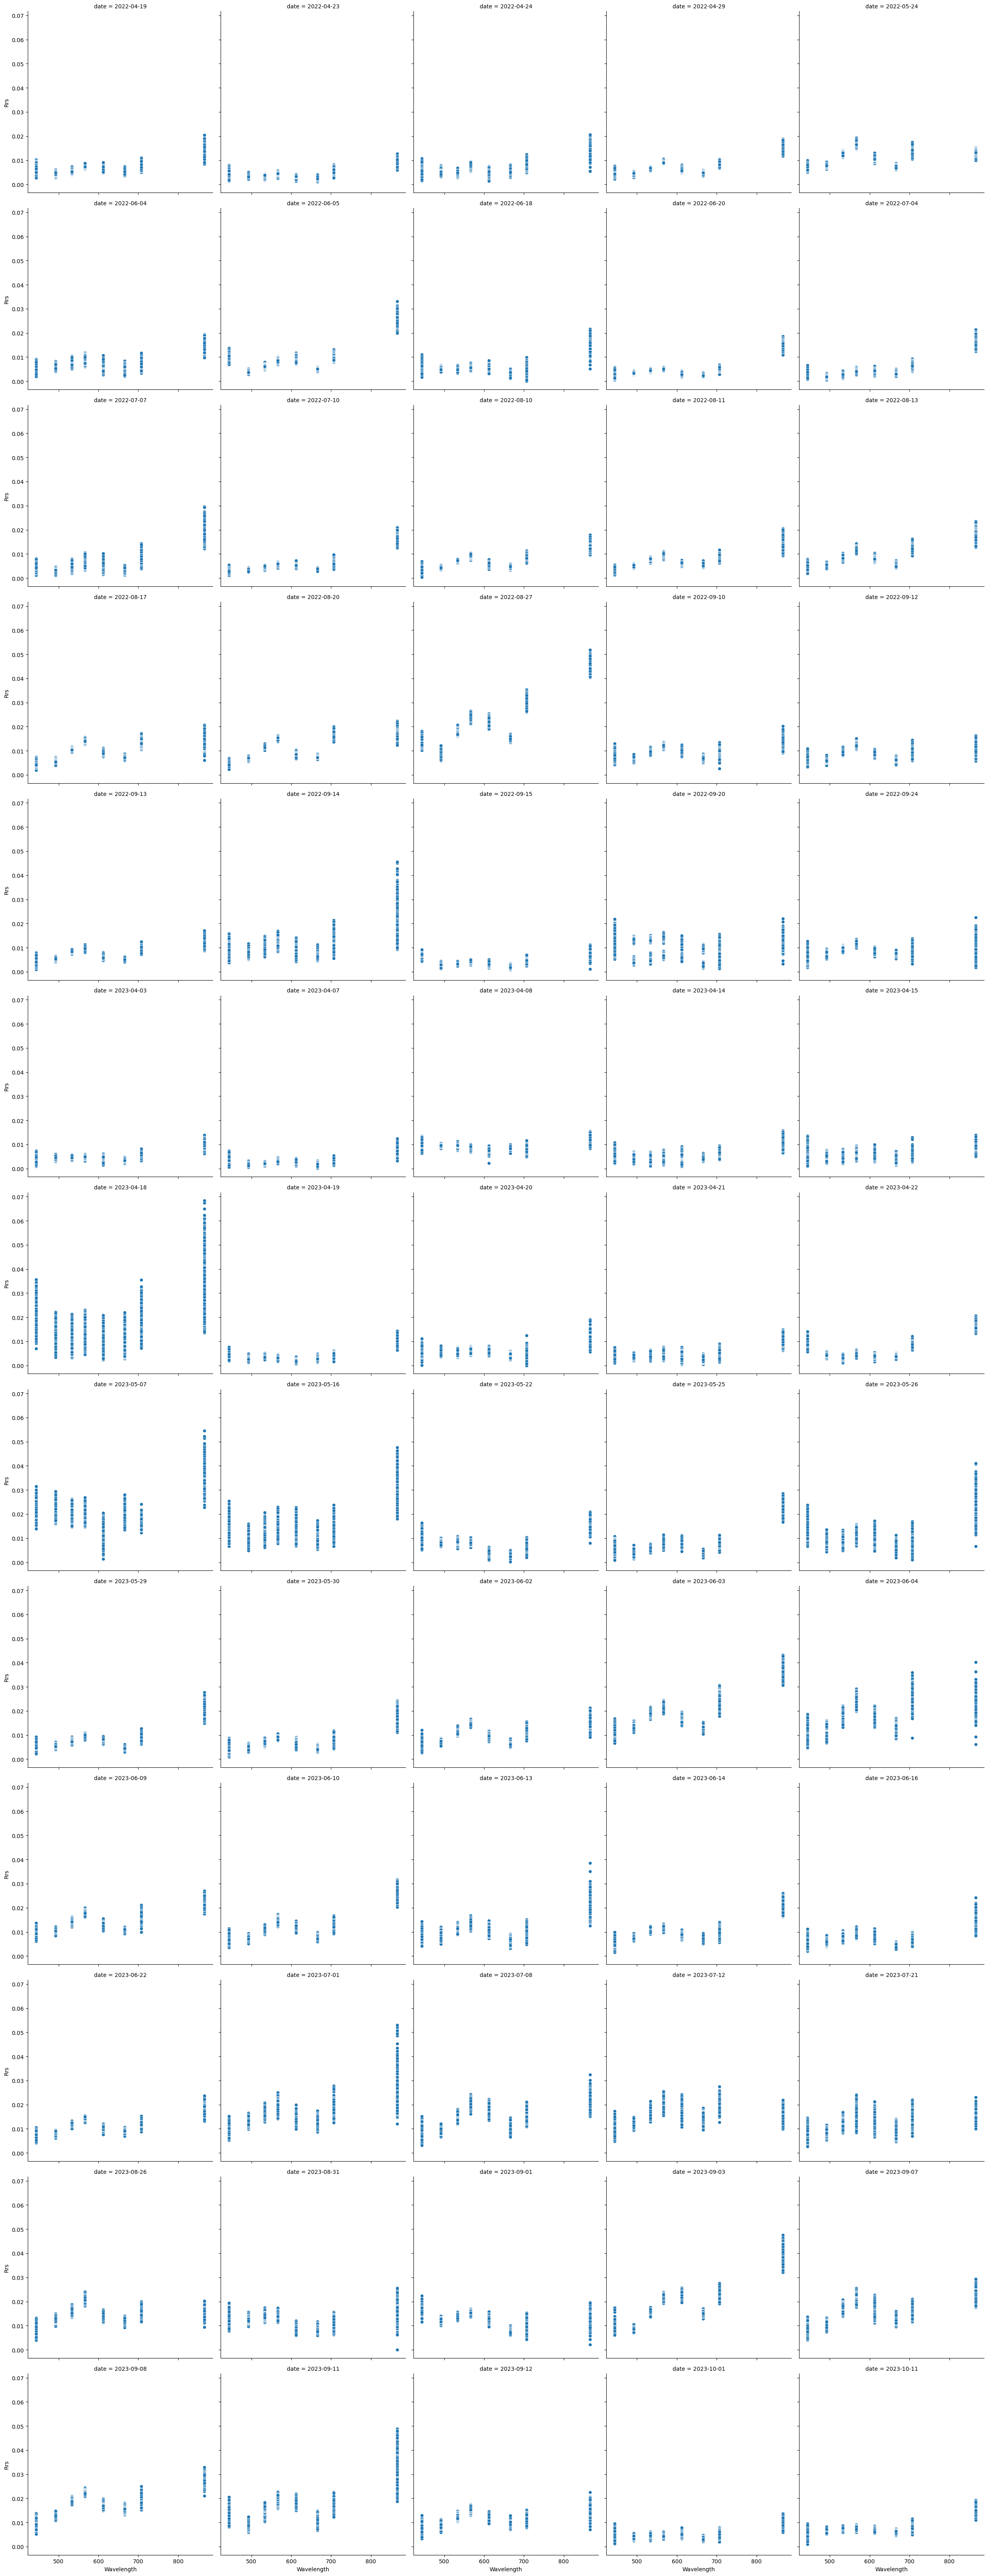

In [13]:
sns.relplot(data=sds_melt, x='Wavelength', y='Rrs', col='date', col_wrap=5, kind='scatter')

In [14]:
sds_med = sds_melt.drop(['location'], axis=1).groupby(['Date', 'date', 'Wavelength', 'Sat_ID', 'flag']).median()
sds_med.rename(columns={'Rrs':'Rrs_sd'}, inplace=True)
sds_med = sds_med.reset_index()
sds_med

,Date,date,Wavelength,Sat_ID,flag,Rrs_sd
0,2022-04-19 10:47:11+00:00,2022-04-19,444.0,2276,good,0.007039
1,2022-04-19 10:47:11+00:00,2022-04-19,492.0,2276,good,0.004813
2,2022-04-19 10:47:11+00:00,2022-04-19,533.0,2276,good,0.005523
3,2022-04-19 10:47:11+00:00,2022-04-19,566.0,2276,good,0.007792
4,2022-04-19 10:47:11+00:00,2022-04-19,612.0,2276,good,0.006974
...,...,...,...,...,...,...
851,2023-10-11 10:31:23+00:00,2023-10-11,566.0,2459,good,0.007558
852,2023-10-11 10:31:23+00:00,2023-10-11,612.0,2459,good,0.006793
853,2023-10-11 10:31:23+00:00,2023-10-11,666.0,2459,good,0.005991
854,2023-10-11 10:31:23+00:00,2023-10-11,707.0,2459,good,0.008331


In [15]:
sds_simple = sds_melt.drop(['Date', 'location', 'Sat_ID', 'flag'], axis=1)
sds_simple.rename(columns={'Rrs':'Rrs_sd'}, inplace=True)
sds_simple

,date,Wavelength,Rrs_sd
0,2022-04-19,444.0,0.008818
1,2022-04-19,492.0,0.005823
2,2022-04-19,533.0,0.005353
3,2022-04-19,566.0,0.007951
4,2022-04-19,612.0,0.007515
...,...,...,...
342395,2023-10-11,566.0,0.007314
342396,2023-10-11,612.0,0.006146
342397,2023-10-11,666.0,0.006410
342398,2023-10-11,707.0,0.007564


# load DALEC data

In [16]:
dalec_df = pd.read_csv('DALEC_SD_bands_2022_23.csv')
dalec_df.drop(['Unnamed: 0', 'month', 'year', 'Date'], axis=1, inplace=True)
dalec_df.rename(columns={'Rrs':'Rrs_DALEC', 'wavelength':'Wavelength'}, inplace=True)
dalec_df

,Rrs_DALEC,Wavelength,date
0,0.003075,444.0,2022-07-28
1,0.004414,492.0,2022-07-28
2,0.006922,533.0,2022-07-28
3,0.008089,566.0,2022-07-28
4,0.006371,612.0,2022-07-28
...,...,...,...
37907,0.004569,566.0,2023-09-30
37908,0.004379,612.0,2023-09-30
37909,0.003612,666.0,2023-09-30
37910,0.003717,707.0,2023-09-30


In [17]:
dalec_med = dalec_df.groupby(['Wavelength', 'date']).median().reset_index()
dalec_med

,Wavelength,date,Rrs_DALEC
0,444.0,2022-07-28,0.003432
1,444.0,2022-07-31,0.003935
2,444.0,2022-08-01,0.003738
3,444.0,2022-08-02,0.003542
4,444.0,2022-08-03,0.002927
...,...,...,...
763,866.0,2023-09-26,0.003964
764,866.0,2023-09-27,0.003757
765,866.0,2023-09-28,0.002344
766,866.0,2023-09-29,0.001369


In [18]:
dalec_med['date'] = pd.to_datetime(dalec_med.date)
sds_med['date'] = pd.to_datetime(sds_med.date)

In [19]:
dalec_sd = dalec_med.merge(sds_med, on=['date', 'Wavelength'], how='left').dropna()
dalec_sd

,Wavelength,date,Rrs_DALEC,Date,Sat_ID,flag,Rrs_sd
10,444.0,2022-08-10,0.004061,2022-08-10 10:27:06+00:00,2432,good,0.004006
11,444.0,2022-08-11,0.003798,2022-08-11 10:28:21+00:00,2427,good,0.003457
12,444.0,2022-08-11,0.003798,2022-08-11 10:28:23+00:00,2427,good,0.003577
14,444.0,2022-08-13,0.003795,2022-08-13 11:13:41+00:00,227a,good,0.004422
17,444.0,2023-07-08,0.001222,2023-07-08 10:29:51+00:00,242d,good,0.009306
...,...,...,...,...,...,...,...
831,866.0,2023-09-08,0.002888,2023-09-08 11:10:06+00:00,2438,good,0.028120
832,866.0,2023-09-08,0.002888,2023-09-08 11:10:08+00:00,2438,good,0.028082
835,866.0,2023-09-11,0.001588,2023-09-11 10:30:46+00:00,24b2,haze,0.031722
836,866.0,2023-09-12,0.000951,2023-09-12 10:32:01+00:00,2415,good,0.014455


In [20]:
sd_med_alt = sds_med.copy()

sd_med_alt['original_date'] = 'nan'
sd_med_alt['date_flag'] = 0

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'original_date'] = '2023-10-01'
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'original_date'] = '2023-08-17'
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'original_date'] = '2023-09-03'

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date_flag'] = 1

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date'] = pd.to_datetime('2023-09-30')
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date'] = pd.to_datetime('2023-08-15')
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date'] = pd.to_datetime('2023-09-01')


In [21]:
dalec_sd_alt = dalec_med.merge(sd_med_alt, on=['date', 'Wavelength'], how='left').dropna()
dalec_sd_alt.date.unique()

<DatetimeArray>
['2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2023-07-08 00:00:00', '2023-07-12 00:00:00', '2023-07-21 00:00:00',
 '2023-08-15 00:00:00', '2023-08-26 00:00:00', '2023-08-31 00:00:00',
 '2023-09-01 00:00:00', '2023-09-07 00:00:00', '2023-09-08 00:00:00',
 '2023-09-11 00:00:00', '2023-09-12 00:00:00', '2023-09-30 00:00:00']
Length: 15, dtype: datetime64[ns]

In [22]:
dalec_sd_alt[dalec_sd_alt.date.dt.year==2023].Date.unique()

<DatetimeArray>
['2023-07-08 10:29:51+00:00', '2023-07-12 10:31:47+00:00',
 '2023-07-12 11:05:26+00:00', '2023-07-21 10:34:37+00:00',
 '2023-07-21 10:34:40+00:00', '2023-07-21 10:35:46+00:00',
 '2022-08-17 11:03:56+00:00', '2022-08-17 11:03:58+00:00',
 '2023-08-26 11:06:47+00:00', '2023-08-26 11:06:49+00:00',
 '2023-08-31 11:11:37+00:00', '2023-08-31 11:11:40+00:00',
 '2023-09-01 10:25:01+00:00', '2023-09-01 10:25:03+00:00',
 '2023-09-03 10:36:33+00:00', '2023-09-07 10:30:39+00:00',
 '2023-09-07 11:11:44+00:00', '2023-09-07 11:11:46+00:00',
 '2023-09-08 11:10:06+00:00', '2023-09-08 11:10:08+00:00',
 '2023-09-11 10:30:46+00:00', '2023-09-12 10:32:01+00:00',
 '2023-09-12 11:11:16+00:00', '2023-10-01 11:10:51+00:00']
Length: 24, dtype: datetime64[ns, UTC]

In [23]:
dalec_sd_alt['year'] = dalec_sd_alt.date.dt.year

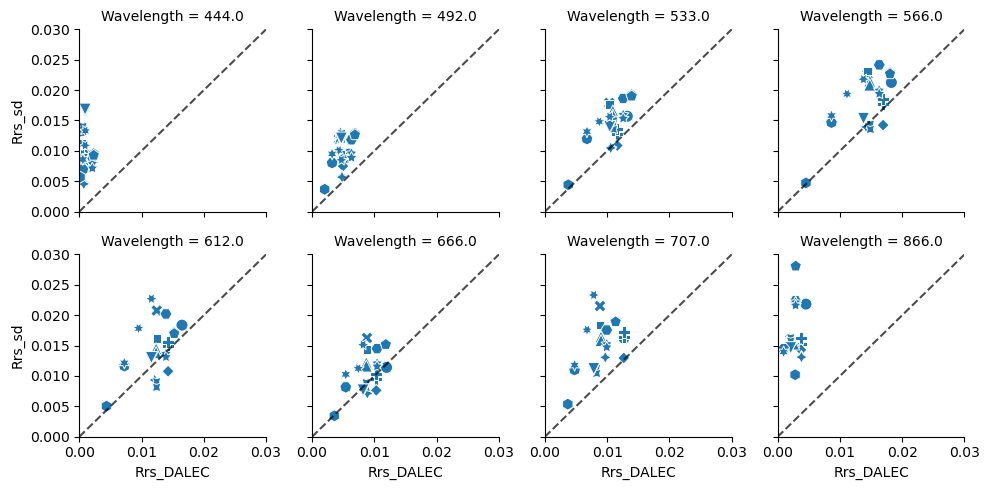

In [24]:
g = sns.FacetGrid(dalec_sd_alt[dalec_sd_alt.year == 2023], col='Wavelength', col_wrap=4, height=2.5)
#g.map_dataframe(sns.regplot, x='Rrs_DALEC', y='Rrs_sd')

#g = sns.lmplot(data=dalec_sd_alt, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength',
#               col_wrap=4, order=1, fit_reg=False, height=3)
#g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))

g.set(ylim=(0, 0.03), xlim=(0, 0.03))

g.map_dataframe(sns.scatterplot, x='Rrs_DALEC', y='Rrs_sd',
                style='Sat_ID',
                #hue='year',
                legend=True,
                #style='date',
                s=75)

for ax in g.axes.flat:
    ax.plot([0, 0.03], [0, 0.03], 'k--', alpha=0.7)
    
def annotate(data, **kws):
    res = sp.stats.linregress(np.log(data['Rrs_DALEC']), np.log(data['Rrs_sd']))
    #res = sp.stats.linregress((data['Rrs_DALEC']), (data['Rrs_sd']))

    ax = plt.gca()
    ax.text(0.3, 0.1, 'r={:.2f}, p={:.2g}'.format(res.rvalue, res.pvalue),
            transform=ax.transAxes)
    x_vals = np.linspace(0.0001, 0.03, 40)
    ax.plot(x_vals,
            np.exp(res.intercept + res.slope*np.log(x_vals)))
             
    ax.text(0.05, 0.85, 'ln(y) = {:.3f}ln(x) + {:.3f}'.format(res.slope, res.intercept),
            transform=ax.transAxes)
    
#    y_fit = data['Rrs_DALEC']*res.slope + res.intercept
#     MAE = np.sum(np.abs(y_fit - data['Rrs_DALEC']))/len(data['Rrs_DALEC'])
#     ax.text(0.05, 0.8, 'MAE={:.2g}'.format(MAE),
#             transform=ax.transAxes)
    
#g.map_dataframe(annotate)

# g.set(xscale="log")
# g.set(yscale="log")

#g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))


plt.tight_layout()
#plt.gca().legend()

plt.show()




# Try a chl-a alg

Going to use various models from https://www.sciencedirect.com/science/article/pii/S0034425719301786#s0010



In [25]:
def chla_NIR_rat(df, ):
    '''
    just use NIR ratio 708/666 with no coefficients
    '''
    ratio = df['Rrs_708'] / df['Rrs_666']
    return ratio

def chla_NDCI(df):
    '''
    use NCDI NIR ratio (708-666)/(708+666)
    '''
    ratio = (df['Rrs_708'] - df['Rrs_666']) / (df['Rrs_708'] + df['Rrs_666'])
    return ratio

def chla_OC4(df,
             a=0.3255, b=-2.7677,
             c=2.4409, d=-1.1288, e=-0.4990, returnX=False):
    '''4 band NASA alg (model L in claire neil paper)'''
    X = np.log10(np.max([df['Rrs_444'], df['Rrs_492'], df['Rrs_533']], axis=0)/df['Rrs_566'])
    if returnX:
        return X
    else:
        return 10**(a + b*X + c*(X**2) + d*(X**3) + e*(X**4))

def chla_OC4_mod(df,
             a=0.3255, b=-2.7677,
             c=2.4409, d=-1.1288, e=-0.4990, returnX=False):
    '''4 band NASA alg (model L in claire neil paper)
    with Rrs_444 removed as we cant trust this one... '''
    X = np.log10(np.max([df['Rrs_492'], df['Rrs_533']], axis=0)/df['Rrs_566'])
    if returnX:
        return X
    else:
        return 10**(a + b*X + c*(X**2) + d*(X**3) + e*(X**4))
    
def chla_OC3(df,
             a=0.2424, b=-2.2146,
             c=1.5193, d=-0.7702,
             e=-0.4291, returnX=False):
    '''3 band NASA alg (model M in claire neil paper)'''
    X = np.log10(np.max([df['Rrs_444'], df['Rrs_492']], axis=0)/df['Rrs_566'])
    if returnX:
        return X
    else:
        return 10**(a + b*X + c*(X**2) + d*(X**3) + e*(X**4))
                
def chla_OC2(df,
             a=0.2389, b=-1.9369,
             c=1.7627, d=-3.0777,
             e=-0.1054, returnX=False):
    '''2 band NASA alg (model N in claire neil paper)'''
    X = np.log10(df['Rrs_492']/df['Rrs_566'])
    if returnX:
        return X
    else:
        return 10**(a + b*X + c*(X**2) + d*(X**3) + e*(X**4))
    
def chla_RBD(df):
    '''
    NIR/red band difference
    '''
    return df['Rrs_708'] - df['Rrs_666']

def chla_RBR3(df):
    return (df['Rrs_666']**-1 - df['Rrs_708']**-1) * df['Rrs_866']

In [26]:
sd_chla = pd.DataFrame(data={'Date':sds_med[sds_med.Wavelength==707.0].reset_index().Date,
                              'date':sds_med[sds_med.Wavelength==707.0].reset_index().date, 
                              'Rrs_708':sds_med[sds_med.Wavelength==707.0].reset_index().Rrs_sd,
                              'Rrs_666':sds_med[sds_med.Wavelength==666.0].reset_index().Rrs_sd,
                              'Rrs_444':sds_med[sds_med.Wavelength==444.0].reset_index().Rrs_sd,
                              'Rrs_492':sds_med[sds_med.Wavelength==492.0].reset_index().Rrs_sd,
                              'Rrs_533':sds_med[sds_med.Wavelength==533.0].reset_index().Rrs_sd,
                              'Rrs_566':sds_med[sds_med.Wavelength==566.0].reset_index().Rrs_sd,
                              'Rrs_866':sds_med[sds_med.Wavelength==866.0].reset_index().Rrs_sd,
                            })

dalec_chla = pd.DataFrame(data={
                              'date':dalec_med[dalec_med.Wavelength==707.0].reset_index().date, 
                              'Rrs_708':dalec_med[dalec_med.Wavelength==707.0].reset_index().Rrs_DALEC,
                              'Rrs_666':dalec_med[dalec_med.Wavelength==666.0].reset_index().Rrs_DALEC,
                              'Rrs_444':dalec_med[dalec_med.Wavelength==444.0].reset_index().Rrs_DALEC,
                              'Rrs_492':dalec_med[dalec_med.Wavelength==492.0].reset_index().Rrs_DALEC,
                              'Rrs_533':dalec_med[dalec_med.Wavelength==533.0].reset_index().Rrs_DALEC,
                              'Rrs_566':dalec_med[dalec_med.Wavelength==566.0].reset_index().Rrs_DALEC,
                              'Rrs_866':dalec_med[dalec_med.Wavelength==866.0].reset_index().Rrs_DALEC,
                            })

In [27]:
dalec_chla

,date,Rrs_708,Rrs_666,Rrs_444,Rrs_492,Rrs_533,Rrs_566,Rrs_866
0,2022-07-28,0.006881,0.005111,0.003432,0.004770,0.007250,0.008443,0.001658
1,2022-07-31,0.008219,0.005539,0.003935,0.005103,0.007571,0.008735,0.002241
2,2022-08-01,0.007481,0.005256,0.003738,0.004873,0.007081,0.008158,0.002003
3,2022-08-02,0.007381,0.004886,0.003542,0.004516,0.006484,0.007414,0.001906
4,2022-08-03,0.006902,0.004405,0.002927,0.004033,0.006101,0.006986,0.001668
...,...,...,...,...,...,...,...,...
91,2023-09-26,0.005212,0.004990,0.001178,0.003200,0.005152,0.006205,0.003964
92,2023-09-27,0.004661,0.004372,0.000516,0.002685,0.004652,0.005581,0.003757
93,2023-09-28,0.003415,0.003499,0.000248,0.002027,0.003762,0.004568,0.002344
94,2023-09-29,0.002448,0.002607,0.000211,0.001769,0.002969,0.003542,0.001369


In [28]:
sd_chla['NIR'] = chla_NIR_rat(sd_chla)
sd_chla['NDCI'] = chla_NDCI(sd_chla)
sd_chla['OC4_X'] = chla_OC4(sd_chla, returnX=True)
sd_chla['OC4_mod_X'] = chla_OC4_mod(sd_chla, returnX=True)

sd_chla['OC3_X'] = chla_OC3(sd_chla, returnX=True)
sd_chla['OC2_X'] = chla_OC2(sd_chla, returnX=True)

sd_chla['OC4'] = chla_OC4(sd_chla)
sd_chla['OC3'] = chla_OC3(sd_chla)
sd_chla['OC2'] = chla_OC2(sd_chla)

sd_chla['RBD'] = chla_RBD(sd_chla)
sd_chla['RBR3'] = chla_RBR3(sd_chla)

dalec_chla['NIR'] = chla_NIR_rat(dalec_chla)
dalec_chla['NDCI'] = chla_NDCI(dalec_chla)
dalec_chla['OC4_X'] = chla_OC4(dalec_chla, returnX=True)
dalec_chla['OC4_mod_X'] = chla_OC4_mod(dalec_chla, returnX=True)

dalec_chla['OC3_X'] = chla_OC3(dalec_chla, returnX=True)
dalec_chla['OC2_X'] = chla_OC2(dalec_chla, returnX=True)

dalec_chla['OC4'] = chla_OC4(dalec_chla)
dalec_chla['OC3'] = chla_OC3(dalec_chla)
dalec_chla['OC2'] = chla_OC2(dalec_chla)

dalec_chla['RBD'] = chla_RBD(dalec_chla)
dalec_chla['RBR3'] = chla_RBR3(dalec_chla)


<Axes: xlabel='Date'>

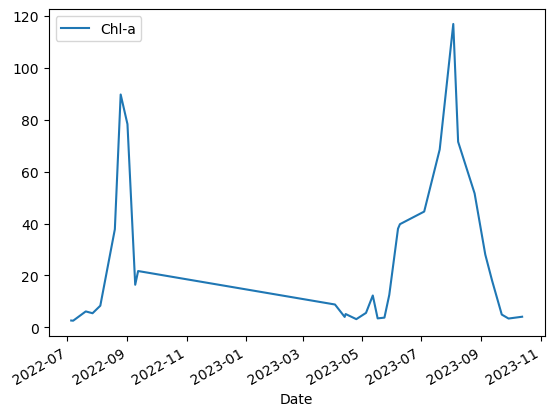

In [29]:
insitu_chl = pd.read_csv('data/chl-a/airthrey_chl.csv')
insitu_chl.Date = pd.to_datetime(insitu_chl.Date, dayfirst=True)
insitu_chl.plot(x='Date', y='Chl-a')
#sns.lineplot(data=sd_chla, x='Date', y='chl-a_J')
#sns.lineplot(data=dalec_chla, x='date', y='chl-a_J')

In [30]:
# not my finest work, but does the job
# by the way, the job being that we are finding the closest in-situ measurements to the superdoves data! 

selected_dates = []
date_diffs = []
selected_chl = []
for sd_date in sd_chla.date:
    date_deltas = []
    for ins_date in insitu_chl.Date:
        #print(ins_date)
        date_deltas.append(sd_date - ins_date)
    date_deltas = np.array(np.abs(date_deltas))
    min_ind = np.where(date_deltas==date_deltas.min())
    #print(min_ind)
    selected_dates.append(insitu_chl.Date[min_ind[0][0]])
    date_diffs.append(date_deltas[min_ind[0][0]])
    selected_chl.append(insitu_chl['Chl-a'][min_ind[0][0]])
    
selected_dates
sd_chla['insitu_chla'] =  selected_chl
sd_chla['insitu_date'] = selected_dates
sd_chla['insitu_date_diff'] = date_diffs

In [31]:
# not my finest work, but does the job
# by the way, the job being that we are finding the closest in-situ measurements to the superdoves data! 


for alg in ['OC4_X', 'OC4_mod_X', 'OC3_X', 'OC2_X', 'OC4',
            'OC3', 'OC2', 'NIR', 'NDCI', 'RBD', 'RBR3']:
    selected_dates = []
    date_diffs = []
    selected_chl = []
    for sd_date in insitu_chl.Date:
        date_deltas = []
        for ins_date in sd_chla.date:
            #print(ins_date)
            date_deltas.append(sd_date - ins_date)
        date_deltas = np.array(np.abs(date_deltas))
        min_ind = np.where(date_deltas==date_deltas.min())
        #print(min_ind)
        selected_dates.append(sd_chla.date[min_ind[0][0]])
        date_diffs.append(date_deltas[min_ind[0][0]])
        selected_chl.append(sd_chla[alg][min_ind[0][0]])
    

    insitu_chl[alg] =  selected_chl
    insitu_chl['sd_date'] = selected_dates
    insitu_chl['sd_date_diff'] = date_diffs

In [32]:
def clean_chla_dates(row):
    if row['insitu_date_diff'] <= timedelta(5):
        return row['insitu_chla']
    else:
        return np.nan

sd_chla['insitu_chl_clean'] = sd_chla.apply(clean_chla_dates, axis=1)
#dalec_chla['insitu_chl_clean'] = dalec_chla.apply(clean_chla_dates, axis=1)

In [33]:
sd_chla

,Date,date,Rrs_708,Rrs_666,Rrs_444,Rrs_492,Rrs_533,Rrs_566,Rrs_866,NIR,...,OC2_X,OC4,OC3,OC2,RBD,RBR3,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean
0,2022-04-19 10:47:11+00:00,2022-04-19,0.009290,0.005885,0.007039,0.004813,0.005523,0.007792,0.015173,1.578683,...,-0.209233,2.834985,2.203960,5.614619,0.003406,0.945076,2.663,2022-07-05,77 days,NaN
1,2022-04-19 10:47:13+00:00,2022-04-19,0.007516,0.004606,0.006993,0.004748,0.005190,0.007102,0.012343,1.631935,...,-0.174817,2.208959,1.808562,4.443417,0.002911,1.037738,2.663,2022-07-05,77 days,NaN
2,2022-04-23 10:26:57+00:00,2022-04-23,0.005446,0.002554,0.004716,0.003583,0.003202,0.004087,0.009052,2.132610,...,-0.057122,1.453868,1.289281,2.269149,0.002892,1.882461,2.663,2022-07-05,73 days,NaN
3,2022-04-23 10:26:59+00:00,2022-04-23,0.005374,0.002521,0.004617,0.003563,0.003144,0.004043,0.009093,2.131413,...,-0.054894,1.491690,1.316737,2.244113,0.002853,1.914291,2.663,2022-07-05,73 days,NaN
4,2022-04-24 11:16:56+00:00,2022-04-24,0.007158,0.004816,0.005823,0.004574,0.004289,0.006639,0.013260,1.486303,...,-0.161801,3.098567,2.363331,4.086994,0.002342,0.900943,2.663,2022-07-05,72 days,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2023-09-11 10:30:46+00:00,2023-09-11,0.017587,0.011256,0.013310,0.010090,0.014821,0.019363,0.031722,1.562393,...,-0.283068,4.802287,4.427998,9.943646,0.006331,1.014386,18.055,2023-09-12,1 days,18.055
103,2023-09-12 10:32:01+00:00,2023-09-12,0.011000,0.008159,0.006929,0.008027,0.011972,0.014661,0.014455,1.348111,...,-0.261609,3.878483,8.660012,8.334089,0.002840,0.457469,18.055,2023-09-12,0 days,18.055
104,2023-09-12 11:11:16+00:00,2023-09-12,0.011789,0.010263,0.008581,0.009497,0.013162,0.015803,0.013952,1.148686,...,-0.221132,3.641127,6.512005,6.115529,0.001526,0.175970,18.055,2023-09-12,0 days,18.055
105,2023-10-01 11:10:51+00:00,2023-10-01,0.005363,0.003436,0.005670,0.003673,0.004422,0.004726,0.010202,1.560670,...,-0.109445,1.322016,1.192083,2.992391,0.001927,1.066555,3.424,2023-09-29,2 days,3.424


In [34]:
sd_reduced = sd_chla.loc[sd_chla.groupby('insitu_date').insitu_date_diff.idxmin()]
sd_reduced = sd_reduced[sd_reduced.insitu_date_diff<'100d']
sd_reduced #= sd_reduced[sd_reduced.date.dt.year==2023]
sd_reduced['year'] = sd_reduced.date.dt.year
len(sd_reduced)

23

In [35]:
insit_reduced = insitu_chl.loc[insitu_chl.groupby('sd_date').sd_date_diff.idxmin()]
insit_reduced = insit_reduced[insit_reduced.sd_date_diff<'100d']
insit_reduced #= sd_reduced[sd_reduced.date.dt.year==2023]
insit_reduced['year'] = insit_reduced.Date.dt.year
insit_reduced

,Date,Chl-a,OC4_X,sd_date,sd_date_diff,OC4_mod_X,OC3_X,OC2_X,OC4,OC3,OC2,NIR,NDCI,RBD,RBR3,year
0,2022-07-05,2.663,-0.081279,2022-07-04,1 days,-0.212219,-0.081279,-0.326859,3.691191,2.709150,14.675328,1.791180,0.283457,0.002836,1.875078,2022
1,2022-07-07,2.592,-0.079599,2022-07-07,0 days,-0.113131,-0.079599,-0.286753,3.646029,2.683347,10.259105,2.161116,0.367312,0.003419,2.876621,2022
2,2022-07-20,6.163,-0.104066,2022-07-10,10 days,-0.104066,-0.225913,-0.225913,4.376936,6.729931,6.333522,1.776907,0.279774,0.002646,2.085418,2022
4,2022-08-04,8.361,-0.106216,2022-08-10,6 days,-0.106216,-0.314552,-0.314552,4.449388,12.855899,13.101437,1.703827,0.260308,0.003312,1.072435,2022
5,2022-08-19,37.789,-0.114873,2022-08-20,1 days,-0.114873,-0.341299,-0.341299,4.756274,15.849414,16.835125,2.224479,0.379745,0.009289,1.109193,2022
6,2022-08-25,89.650,-0.122245,2022-08-27,2 days,-0.122245,-0.227783,-0.393995,5.038079,6.817507,28.930238,2.043424,0.342845,0.015878,1.553680,2022
8,2022-09-09,16.429,-0.098161,2022-09-10,1 days,-0.098161,-0.177696,-0.262719,4.185234,4.872957,8.408756,1.513492,0.204294,0.003322,0.671629,2022
9,2022-09-12,21.707,-0.104921,2022-09-12,0 days,-0.104921,-0.276199,-0.322066,4.405582,9.631687,14.035617,1.576755,0.223830,0.003531,0.631070,2022
10,2023-04-03,8.825,-0.017216,2023-04-03,0 days,-0.017216,-0.026196,-0.026196,2.365253,2.002032,1.953912,1.533752,0.210657,0.001890,0.964214,2023
12,2023-04-14,5.158,0.002026,2023-04-14,0 days,-0.028292,0.002026,-0.028292,2.088828,1.729496,1.973240,1.266962,0.117762,0.001361,0.430301,2023


In [36]:
insit_reduced

,Date,Chl-a,OC4_X,sd_date,sd_date_diff,OC4_mod_X,OC3_X,OC2_X,OC4,OC3,OC2,NIR,NDCI,RBD,RBR3,year
0,2022-07-05,2.663,-0.081279,2022-07-04,1 days,-0.212219,-0.081279,-0.326859,3.691191,2.709150,14.675328,1.791180,0.283457,0.002836,1.875078,2022
1,2022-07-07,2.592,-0.079599,2022-07-07,0 days,-0.113131,-0.079599,-0.286753,3.646029,2.683347,10.259105,2.161116,0.367312,0.003419,2.876621,2022
2,2022-07-20,6.163,-0.104066,2022-07-10,10 days,-0.104066,-0.225913,-0.225913,4.376936,6.729931,6.333522,1.776907,0.279774,0.002646,2.085418,2022
4,2022-08-04,8.361,-0.106216,2022-08-10,6 days,-0.106216,-0.314552,-0.314552,4.449388,12.855899,13.101437,1.703827,0.260308,0.003312,1.072435,2022
5,2022-08-19,37.789,-0.114873,2022-08-20,1 days,-0.114873,-0.341299,-0.341299,4.756274,15.849414,16.835125,2.224479,0.379745,0.009289,1.109193,2022
6,2022-08-25,89.650,-0.122245,2022-08-27,2 days,-0.122245,-0.227783,-0.393995,5.038079,6.817507,28.930238,2.043424,0.342845,0.015878,1.553680,2022
8,2022-09-09,16.429,-0.098161,2022-09-10,1 days,-0.098161,-0.177696,-0.262719,4.185234,4.872957,8.408756,1.513492,0.204294,0.003322,0.671629,2022
9,2022-09-12,21.707,-0.104921,2022-09-12,0 days,-0.104921,-0.276199,-0.322066,4.405582,9.631687,14.035617,1.576755,0.223830,0.003531,0.631070,2022
10,2023-04-03,8.825,-0.017216,2023-04-03,0 days,-0.017216,-0.026196,-0.026196,2.365253,2.002032,1.953912,1.533752,0.210657,0.001890,0.964214,2023
12,2023-04-14,5.158,0.002026,2023-04-14,0 days,-0.028292,0.002026,-0.028292,2.088828,1.729496,1.973240,1.266962,0.117762,0.001361,0.430301,2023


In [77]:
sd_chla.melt(id_vars=['date', 'insitu_chl_clean'],
             value_vars=['OC3_X', 'OC4_X', 'OC3', 'OC4'],
             value_name='sd_chla', var_name='Algorithm')

,date,insitu_chl_clean,Algorithm,sd_chla
0,2022-04-19,NaN,OC3_X,-0.044151
1,2022-04-19,NaN,OC3_X,-0.006712
2,2022-04-23,NaN,OC3_X,0.062195
3,2022-04-23,NaN,OC3_X,0.057712
4,2022-04-24,NaN,OC3_X,-0.056924
...,...,...,...,...
423,2023-09-11,18.055,OC4,4.802287
424,2023-09-12,18.055,OC4,3.878483
425,2023-09-12,18.055,OC4,3.641127
426,2023-10-01,3.424,OC4,1.322016


In [75]:
sd_chla.columns

Index(['Date', 'date', 'Rrs_708', 'Rrs_666', 'Rrs_444', 'Rrs_492', 'Rrs_533',
       'Rrs_566', 'Rrs_866', 'NIR', 'NDCI', 'OC4_X', 'OC4_mod_X', 'OC3_X',
       'OC2_X', 'OC4', 'OC3', 'OC2', 'RBD', 'RBR3', 'insitu_chla',
       'insitu_date', 'insitu_date_diff', 'insitu_chl_clean'],
      dtype='object')

In [78]:
insit_reduced

,Date,Chl-a,OC4_X,sd_date,sd_date_diff,OC4_mod_X,OC3_X,OC2_X,OC4,OC3,OC2,NIR,NDCI,RBD,RBR3,year,OC2_tuned,OC3_tuned,OC4_tuned,OC4_mod_tuned
0,2022-07-05,2.663,-0.081279,2022-07-04,1 days,-0.212219,-0.081279,-0.326859,3.691191,2.709150,14.675328,1.791180,0.283457,0.002836,1.875078,2022,13.067515,5.679126,10.155052,2.501772
1,2022-07-07,2.592,-0.079599,2022-07-07,0 days,-0.113131,-0.079599,-0.286753,3.646029,2.683347,10.259105,2.161116,0.367312,0.003419,2.876621,2022,12.934334,5.606760,9.855876,19.604706
2,2022-07-20,6.163,-0.104066,2022-07-10,10 days,-0.104066,-0.225913,-0.225913,4.376936,6.729931,6.333522,1.776907,0.279774,0.002646,2.085418,2022,14.553173,23.231614,16.453769,17.957663
4,2022-08-04,8.361,-0.106216,2022-08-10,6 days,-0.106216,-0.314552,-0.314552,4.449388,12.855899,13.101437,1.703827,0.260308,0.003312,1.072435,2022,12.736993,30.783651,17.358021,18.380255
5,2022-08-19,37.789,-0.114873,2022-08-20,1 days,-0.114873,-0.341299,-0.341299,4.756274,15.849414,16.835125,2.224479,0.379745,0.009289,1.109193,2022,13.994219,25.048179,21.858380,19.872773
6,2022-08-25,89.650,-0.122245,2022-08-27,2 days,-0.122245,-0.227783,-0.393995,5.038079,6.817507,28.930238,2.043424,0.342845,0.015878,1.553680,2022,31.446948,23.601530,27.136802,20.776023
8,2022-09-09,16.429,-0.098161,2022-09-10,1 days,-0.098161,-0.177696,-0.262719,4.185234,4.872957,8.408756,1.513492,0.204294,0.003322,0.671629,2022,13.628902,14.497224,14.310613,16.728161
9,2022-09-12,21.707,-0.104921,2022-09-12,0 days,-0.104921,-0.276199,-0.322066,4.405582,9.631687,14.035617,1.576755,0.223830,0.003531,0.631070,2022,12.897357,31.446698,16.804742,18.127707
10,2023-04-03,8.825,-0.017216,2023-04-03,0 days,-0.017216,-0.026196,-0.026196,2.365253,2.002032,1.953912,1.533752,0.210657,0.001890,0.964214,2023,3.795184,4.127781,4.998368,4.438815
12,2023-04-14,5.158,0.002026,2023-04-14,0 days,-0.028292,0.002026,-0.028292,2.088828,1.729496,1.973240,1.266962,0.117762,0.001361,0.430301,2023,3.843954,3.827313,4.607980,5.190129


In [38]:
def OC_polyfit(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False):
    '''
    fits a 4th order polynomial to the data in df[alg] against df[chla_name]\
    alg should be the X output from one of the OC algorithms
    uses log10 of chl-a to match 
    '''
    coeff = np.polyfit(df[alg],
                       np.log10(df[chla_name]), deg=4)
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
    
def OC_linfit_regu(df, alg, chla_name='Chl-a', returnCoeff=False,
              debug=False, regrModel=Ridge, cv=5):
    '''
    fits a linear model to the data in df[alg] against df[chla_name]
    alg should be the X output from an OC algorithm
    does logging and stuff
    '''
    params={'alpha':np.logspace(-3, 0, 20)}
    regr = GridSearchCV(regrModel(random_state=0,
                                 fit_intercept=True),
                        params, cv=cv,
                        scoring='neg_mean_squared_error')

    regr.fit(df[alg].values.reshape(-1, 1),
             np.log10(df[chla_name]))
    print(regr.best_params_)
    
    coeff = np.array([regr.best_estimator_.intercept_] + list(regr.best_estimator_.coef_))[::-1]
    
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
def OC_polyfit_lin(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False,):
    '''
    fits a 4th order polynomial to the data in df[alg] against df[chla_name]\
    alg should be the X output from one of the OC algorithms
    uses sklearn LinearRegression to force the coeffs to be the 'right' signs
    uses log10 of chl-a to match 
    '''
    # +,  -, +, -, -
    coeff_signs = np.array([1, -1, 1, -1, -1])
    X = coeff_signs * np.stack((df[alg].values**0, df[alg].values,
                                df[alg].values**2, df[alg].values**3,
                                df[alg].values**4), 
                                axis=1)
    
    regr = LinearRegression(positive=True,
                            fit_intercept=False)

    regr.fit(X, np.log10(df[chla_name]))
    
    coeff = regr.coef_
#     coeff = np.array([regr.intercept_] + list(regr.coef_))
    coeff = (coeff_signs*coeff)[::-1]
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
    
def OC_polyfit_REGU(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False,
                    alpha=0.00001, regrModel=Ridge, cv=5):
    '''
    fits a 4th order polynomial to the data in df[alg] against df[chla_name]\
    alg should be the X output from one of the OC algorithms
    uses regularisation fit to ensure low coeff values (ie. ElasticNet)
    uses log10 of chl-a to match 
    '''
    # +,  -, +, -, -
    coeff_signs = np.array([1, -1, 1, -1, -1])
    X = coeff_signs * np.stack((df[alg].values**0, df[alg].values,
                                df[alg].values**2, df[alg].values**3,
                                df[alg].values**4), 
                                axis=1)
    
    params={'alpha':np.logspace(-8, 0, 20)}
    regr = GridSearchCV(regrModel(random_state=0, positive=True,
                                 fit_intercept=False),
                        params, cv=cv,
                        scoring='neg_mean_squared_error')
#     regr = regrModel(random_state=0, positive=True,
#                      fit_intercept=True, alpha=alpha)
    regr.fit(X, np.log10(df[chla_name]))
    print(regr.best_params_)
    
    coeff = np.array(list(regr.best_estimator_.coef_))
#     coeff = np.array([regr.intercept_] + list(regr.coef_))
    coeff = (coeff_signs*coeff)[::-1]
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
    
    
def OC_polyfit_sp(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False,
                  bounds=None, p0=None, method='trf', preventOverfit=False):
    '''
    fits a 4th order polynomial to the data in df[alg] against df[chla_name]\
    alg should be the X output from one of the OC algorithms
    uses log10 of chl-a to match 
    '''
    def func(x, a, b, c, d, e):
        return a + (b * x) + (c * x ** 2) + (d * x ** 3) + (e * x ** 4)
    
    if bounds is None:
        bounds = ([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf],
                  [np.inf, np.inf, np.inf, np.inf, np.inf])
        
    x = list(df[alg].values)
    y = list(np.log10(df[chla_name]))
    if preventOverfit:
        # experimental - add a very small Chl-a value (1) with a large +ve value of X 
        for xi in np.linspace(0.1, 0.5, 100):
            x.append(xi)
            y.append(0)

    coeff, _ = sp.optimize.curve_fit(func, x, y,
                                     bounds=bounds, p0=p0, method=method)
    
    coeff = coeff[::-1] # reverse order of coeff for compatability with numpy polyfit
    
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
    
def RBI_polyfit(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False):
    '''
    fits a linear model to the data in df[alg] against df[chla_name] 
    '''
    coeff = np.polyfit(df[alg],
                       df[chla_name], deg=1)
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return np.polyval(coeff, df[alg])
    
def OC_linfit(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False):
    '''
    fits a linear model to the data in df[alg] against df[chla_name] 
    and does log on chl-a so that this works with OC_X data
    '''
    coeff = np.polyfit(df[alg],
                       np.log10(df[chla_name]), deg=1)
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))

for OC in ['OC2_X', 'OC3_X', 'OC4_X', 'OC4_mod_X',]:
    insit_reduced[OC[:-2] + '_tuned'] = OC_polyfit(insit_reduced, OC)

In [39]:
for OC in ['OC2_X', 'OC3_X', 'OC4_X', 'OC4_mod_X',]:
    print(OC)
    sd_chla[OC[:-2] + '_tuned'] = OC_polyfit(insit_reduced, OC, debug=True)

OC2_X
[4.71466360e+02 3.28714552e+02 6.26568261e+01 7.40027706e-02
 5.43860249e-01]
0    -0.326859
1    -0.286753
2    -0.225913
4    -0.314552
5    -0.341299
6    -0.393995
8    -0.262719
9    -0.322066
10   -0.026196
12   -0.028292
13   -0.058030
14    0.058098
16   -0.146148
17   -0.355862
18   -0.246869
20   -0.247011
21   -0.161690
22   -0.330698
25   -0.217949
26   -0.407315
27   -0.261609
29   -0.109445
30   -0.050434
Name: OC2_X, dtype: float64
0      2.663
1      2.592
2      6.163
4      8.361
5     37.789
6     89.650
8     16.429
9     21.707
10     8.825
12     5.158
13     3.189
14     5.590
16     3.483
17     3.776
18    12.530
20    39.744
21    44.595
22    68.487
25    51.580
26    28.054
27    18.055
29     3.424
30     4.118
Name: Chl-a, dtype: float64
OC3_X
[-121.86784668   -6.8114566    16.64023677   -0.75848887    0.58436242]
0    -0.081279
1    -0.079599
2    -0.225913
4    -0.314552
5    -0.341299
6    -0.227783
8    -0.177696
9    -0.276199
10   -0.026196
12 

In [40]:
[1, 2, 3]

[1, 2, 3]

In [41]:
def MAE(true, pred):
    return np.sum(np.abs(true - pred))/len(pred)
def MAPE(true, pred):
    return 100 * np.sum(np.abs((true - pred)/true))/len(pred)
def RMSE(true, pred):
    return np.sqrt(np.sum((true - pred)**2)/len(pred))

def RMSD(y_true, y_est):
    '''
    logspace RMSE
    '''
    y_true = np.log10(y_true)
    y_est = np.log10(y_est)
    return 10**(np.sqrt(np.mean((y_true - y_est)**2)))-1

def MAD(y_true: np.ndarray, y_est: np.ndarray) -> float:
    ''' Return the mean absolute difference (MAD) '''
    y_true = np.log10(y_true)
    y_est = np.log10(y_est)
    return 10**np.mean(np.abs(y_true - y_est))-1

def MAPD(y_true: np.ndarray, y_est: np.ndarray) -> float:
    ''' Return the median absolute percentage difference (MAPD) '''
    return np.median(np.abs((y_true - y_est) / y_true)) * 100


def MDSA(y_true: np.ndarray, y_est: np.ndarray) -> float:
    ''' Return the median symmetric accuracy (MdSA) '''
    return (np.exp(np.median(np.abs(np.log(y_est / y_true)))) - 1) * 100


def SSPB(y_true: np.ndarray, y_est: np.ndarray) -> float:
    ''' Return the symmetric signed percentage bias (SSPB) '''
    med = np.median( np.log(y_est / y_true) )
    return np.sign(med) * (np.exp(np.abs(med)) - 1) * 100

In [42]:
insit_melt = insit_reduced.melt(value_vars=['OC4', 'OC3', 'OC2',
                                            'OC2_tuned', 'OC3_tuned',
                                            'OC4_tuned', 'NIR',
                                            'NDCI',],
                                id_vars=['Date',
                                          'Chl-a',
                                          'sd_date',
                                          'sd_date_diff'],
                                value_name='SD_chla',
                                var_name='Algorithm')

In [43]:
insit_melt.sd_date_diff <= '3 days'

0       True
1       True
2      False
3      False
4       True
       ...  
179     True
180     True
181     True
182     True
183     True
Name: sd_date_diff, Length: 184, dtype: bool

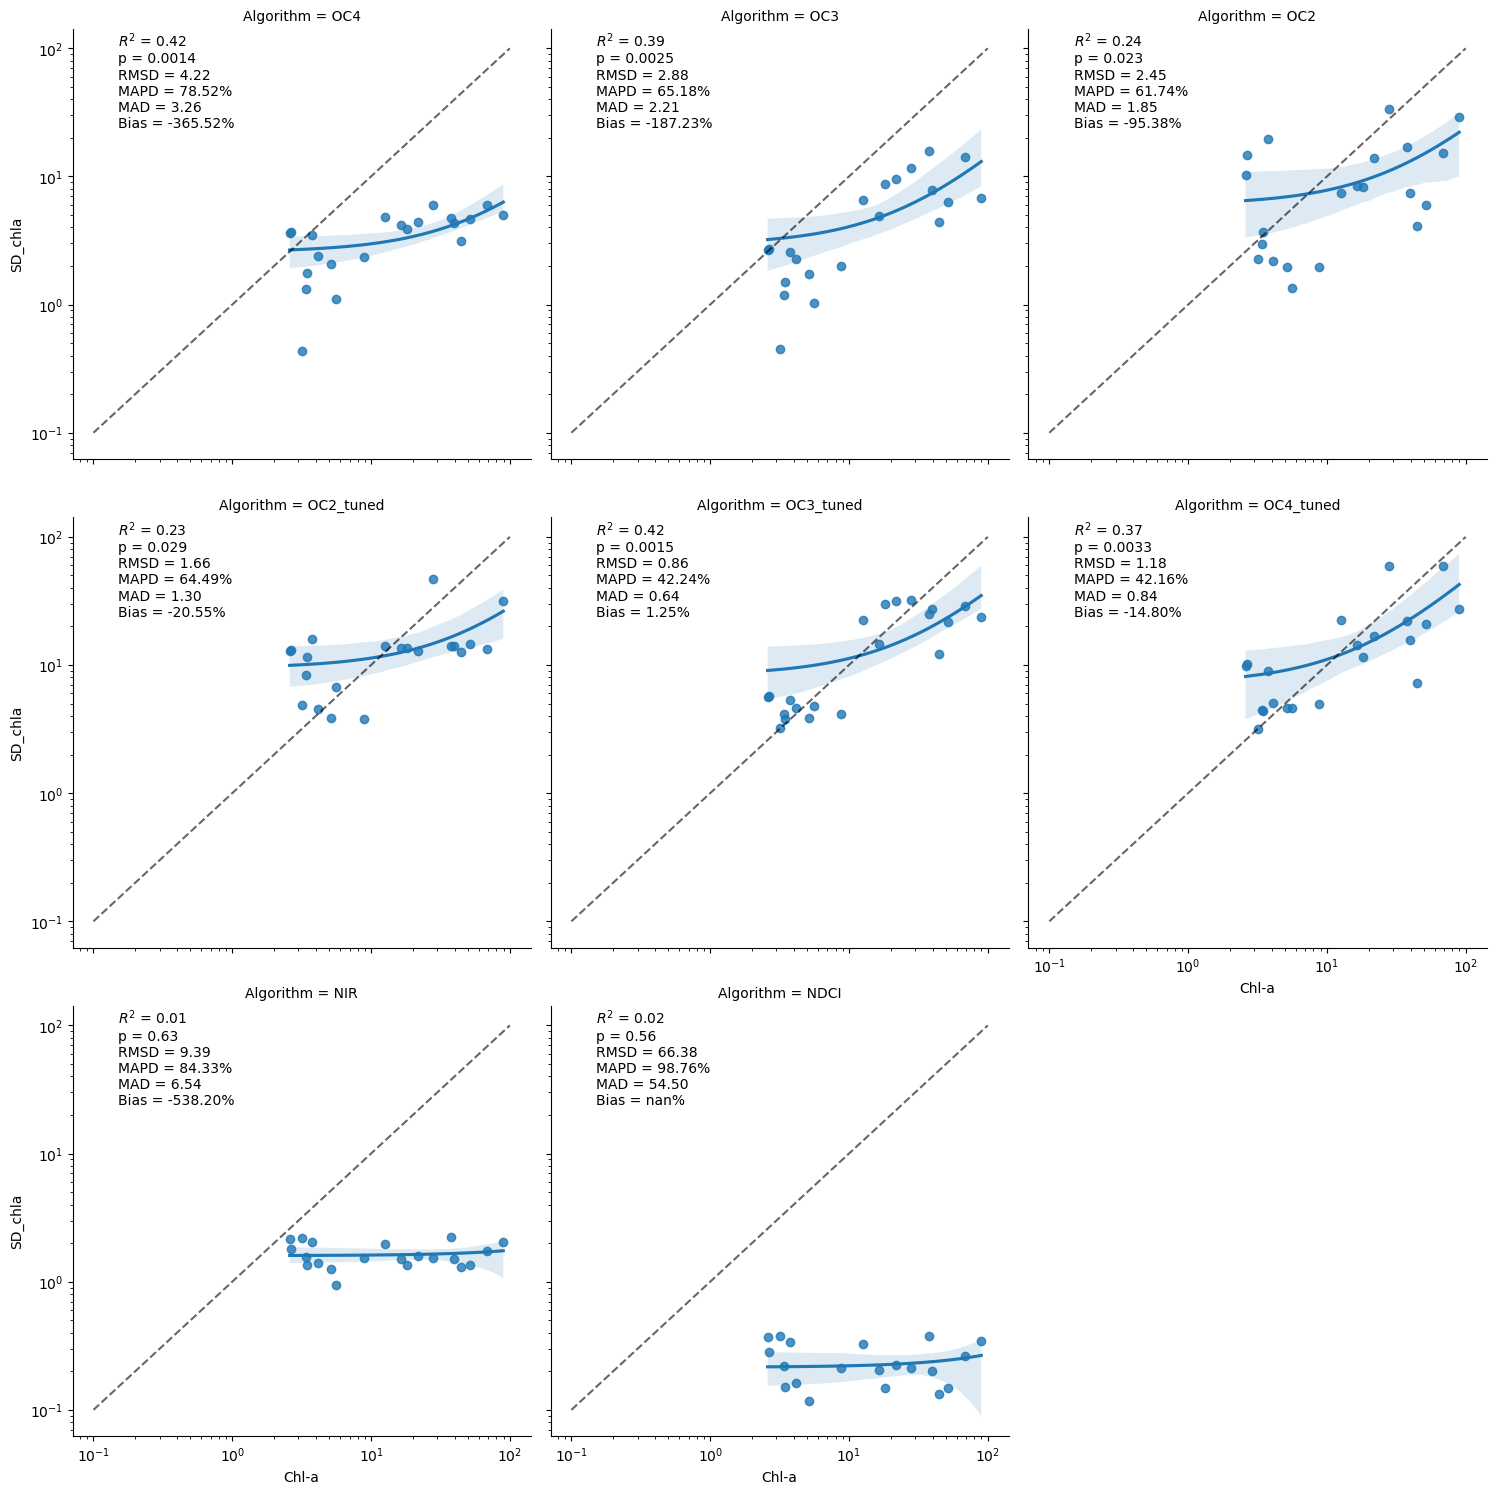

In [44]:
def annotate(data, x='Chl-a', y='sdfkjdf', order=1, plot=True, lims=None, **kws):
    res = sp.stats.linregress(data.dropna()[x]**order, data.dropna()[y])
    mae = MAE(data.dropna()[x], data.dropna()[y])
    mape = MAPE(data.dropna()[x], data.dropna()[y])
    rmsd = RMSD(data.dropna()[x], data.dropna()[y])
    bias = SSPB(data.dropna()[x], data.dropna()[y])
    mad = MAD(data.dropna()[x], data.dropna()[y])
    mapd = MAPD(data.dropna()[x], data.dropna()[y])
    ax = plt.gca()
    ax.text(0.1, 0.77, '$R^2$ = {:.2f} \np = {:.2g}\
                       \nRMSD = {:.2f} \nMAPD = {:.2f}%\
                       \nMAD = {:.2f} \nBias = {:.2f}%'.format(res.rvalue**2,
                                                              res.pvalue,
                                                              rmsd, mapd,
                                                              mad, bias),
            transform=ax.transAxes)

    if plot:
        ax.plot([0.1, 100], [0.1, 100], 'k--', alpha=0.6)

g = sns.lmplot(data=insit_melt[insit_melt.sd_date_diff <= '3 days'],
               x='Chl-a', y='SD_chla', col='Algorithm', col_wrap=3,
               facet_kws={'sharey':True, 'sharex':True})
#sns.scatterplot(data=insit_reduced, x='Chl-a', y=alg, hue='insitu_date_diff', legend=True)
g.map_dataframe(annotate, y='SD_chla', plot=True)# lims=[0.1, 100])

lims=[[0.1, 100], [0.1, 100], [0.1, 100],
      [.1, 100], [.1, 100], [.1, 100],
      [0.1, 100], [0.1, 100]]

for ax, lim in zip(g.axes, lims):
#     ax.set_xlim(lim[0], lim[1])
#     ax.set_ylim(lim[0], lim[1])
    ax.set_yscale('log')
    ax.set_xscale('log')
plt.show()

In [63]:
insit_melt

,Date,Chl-a,sd_date,sd_date_diff,Algorithm,SD_chla
0,2022-07-05,2.663,2022-07-04,1 days,OC4,3.691191
1,2022-07-07,2.592,2022-07-07,0 days,OC4,3.646029
2,2022-07-20,6.163,2022-07-10,10 days,OC4,4.376936
3,2022-08-04,8.361,2022-08-10,6 days,OC4,4.449388
4,2022-08-19,37.789,2022-08-20,1 days,OC4,4.756274
...,...,...,...,...,...,...
179,2023-08-25,51.580,2023-08-26,1 days,NDCI,0.148710
180,2023-09-05,28.054,2023-09-03,2 days,NDCI,0.212601
181,2023-09-12,18.055,2023-09-12,0 days,NDCI,0.148252
182,2023-09-29,3.424,2023-10-01,2 days,NDCI,0.218954


<Axes: xlabel='Date', ylabel='SD_chla'>

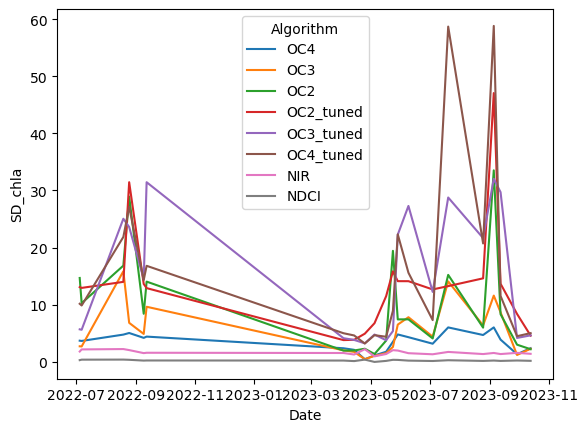

In [64]:
sns.lineplot(data=insit_melt[insit_melt.sd_date_diff <= '3 days'],
             x='Date', y='SD_chla', hue='Algorithm')

In [45]:
np.max([np.array([0, 0]), np.array([-1, 2])], axis=0)

array([0, 2])

In [46]:
np.ceil(np.abs(np.log10(7))) * np.sign(np.log10(7))

1.0

0     2022-07-05
1     2022-07-06
2     2022-07-07
3     2022-07-08
4     2022-07-09
         ...    
461   2023-10-09
462   2023-10-10
463   2023-10-11
464   2023-10-12
465   2023-10-13
Name: date, Length: 466, dtype: datetime64[ns]

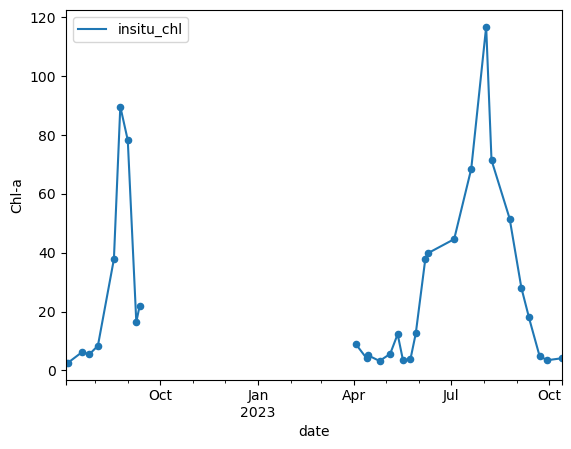

In [47]:
fig, ax = plt.subplots(1,1)
insitu_chl_daily = insitu_chl.copy().set_index('Date')
insitu_chl.plot(x='Date', y='Chl-a', ax=ax, kind='scatter')
#print(insitu_chl_daily.isna())
# 2022-09-12
# 2023-04-03
insitu_chl_daily = insitu_chl_daily.resample('1d').asfreq().reset_index()
insitu_chl_daily['Chl-a'] = insitu_chl_daily['Chl-a'].interpolate()#method='spline', order=3)
insitu_chl_daily.loc[(insitu_chl_daily['Date']>'2022-09-12') & (insitu_chl_daily['Date']<'2023-04-03'), 'Chl-a'] = np.nan
insitu_chl_daily.rename({'Date':'date', 'Chl-a':'insitu_chl'}, inplace=True, axis=1) 
insitu_chl_daily['date'] 
insitu_chl_daily.plot(x='date', y='insitu_chl', ax=ax)
insitu_chl_daily = insitu_chl_daily[['date', 'insitu_chl']]
insitu_chl_daily.date

In [48]:
dalec_insi_daily = dalec_chla.merge(insitu_chl_daily, on='date')
dalec_insi_daily['year'] = dalec_insi_daily.date.dt.year

In [49]:
dalec_insi_2023 = dalec_insi_daily.copy()[dalec_insi_daily.year==2023]

In [50]:
for OC in ['OC2_X', 'OC3_X', 'OC4_X', 'OC4_mod_X']:
    dalec_insi_2023[OC[:-2] + '_tuned'] = OC_linfit(dalec_insi_2023,
                                                           OC, chla_name='insitu_chl',
                                                        #   regrModel=Ridge, cv=5
                                                        )
    
for RBI in ['NDCI', 'NIR', 'RBD', 'RBR3']:
    dalec_insi_2023[RBI + '_tuned'] = RBI_polyfit(dalec_insi_2023, RBI, chla_name='insitu_chl')

In [51]:
dalec_insi_2023.columns

Index(['date', 'Rrs_708', 'Rrs_666', 'Rrs_444', 'Rrs_492', 'Rrs_533',
       'Rrs_566', 'Rrs_866', 'NIR', 'NDCI', 'OC4_X', 'OC4_mod_X', 'OC3_X',
       'OC2_X', 'OC4', 'OC3', 'OC2', 'RBD', 'RBR3', 'insitu_chl', 'year',
       'OC2_tuned', 'OC3_tuned', 'OC4_tuned', 'OC4_mod_tuned', 'NDCI_tuned',
       'NIR_tuned', 'RBD_tuned', 'RBR3_tuned'],
      dtype='object')

In [52]:
dalec_insi_melt = dalec_insi_2023.melt(value_vars=['OC2', 'OC3', 'OC4',
                                                    'OC2_tuned', 'OC3_tuned',
                                                    'OC4_tuned', 'OC4_mod_tuned', 'NIR',
                                                    'NDCI', 'RBD', 'RBR3',
                                                    'NIR_tuned',
                                                    'NDCI_tuned', 'RBD_tuned', 'RBR3_tuned'],
                                id_vars=['date', 'year',
                                          'insitu_chl',
                                          ],
                                value_name='DALEC_chla',
                                var_name='Algorithm')

dalec_insi_melt

,date,year,insitu_chl,Algorithm,DALEC_chla
0,2023-07-08,2023,50.568000,OC2,89.311638
1,2023-07-09,2023,52.061250,OC2,188.553267
2,2023-07-10,2023,53.554500,OC2,74.047414
3,2023-07-11,2023,55.047750,OC2,67.207857
4,2023-07-12,2023,56.541000,OC2,152.690157
...,...,...,...,...,...
1195,2023-09-26,2023,4.079286,RBR3_tuned,48.831400
1196,2023-09-27,2023,3.860857,RBR3_tuned,55.345340
1197,2023-09-28,2023,3.642429,RBR3_tuned,32.098525
1198,2023-09-29,2023,3.424000,RBR3_tuned,26.153161


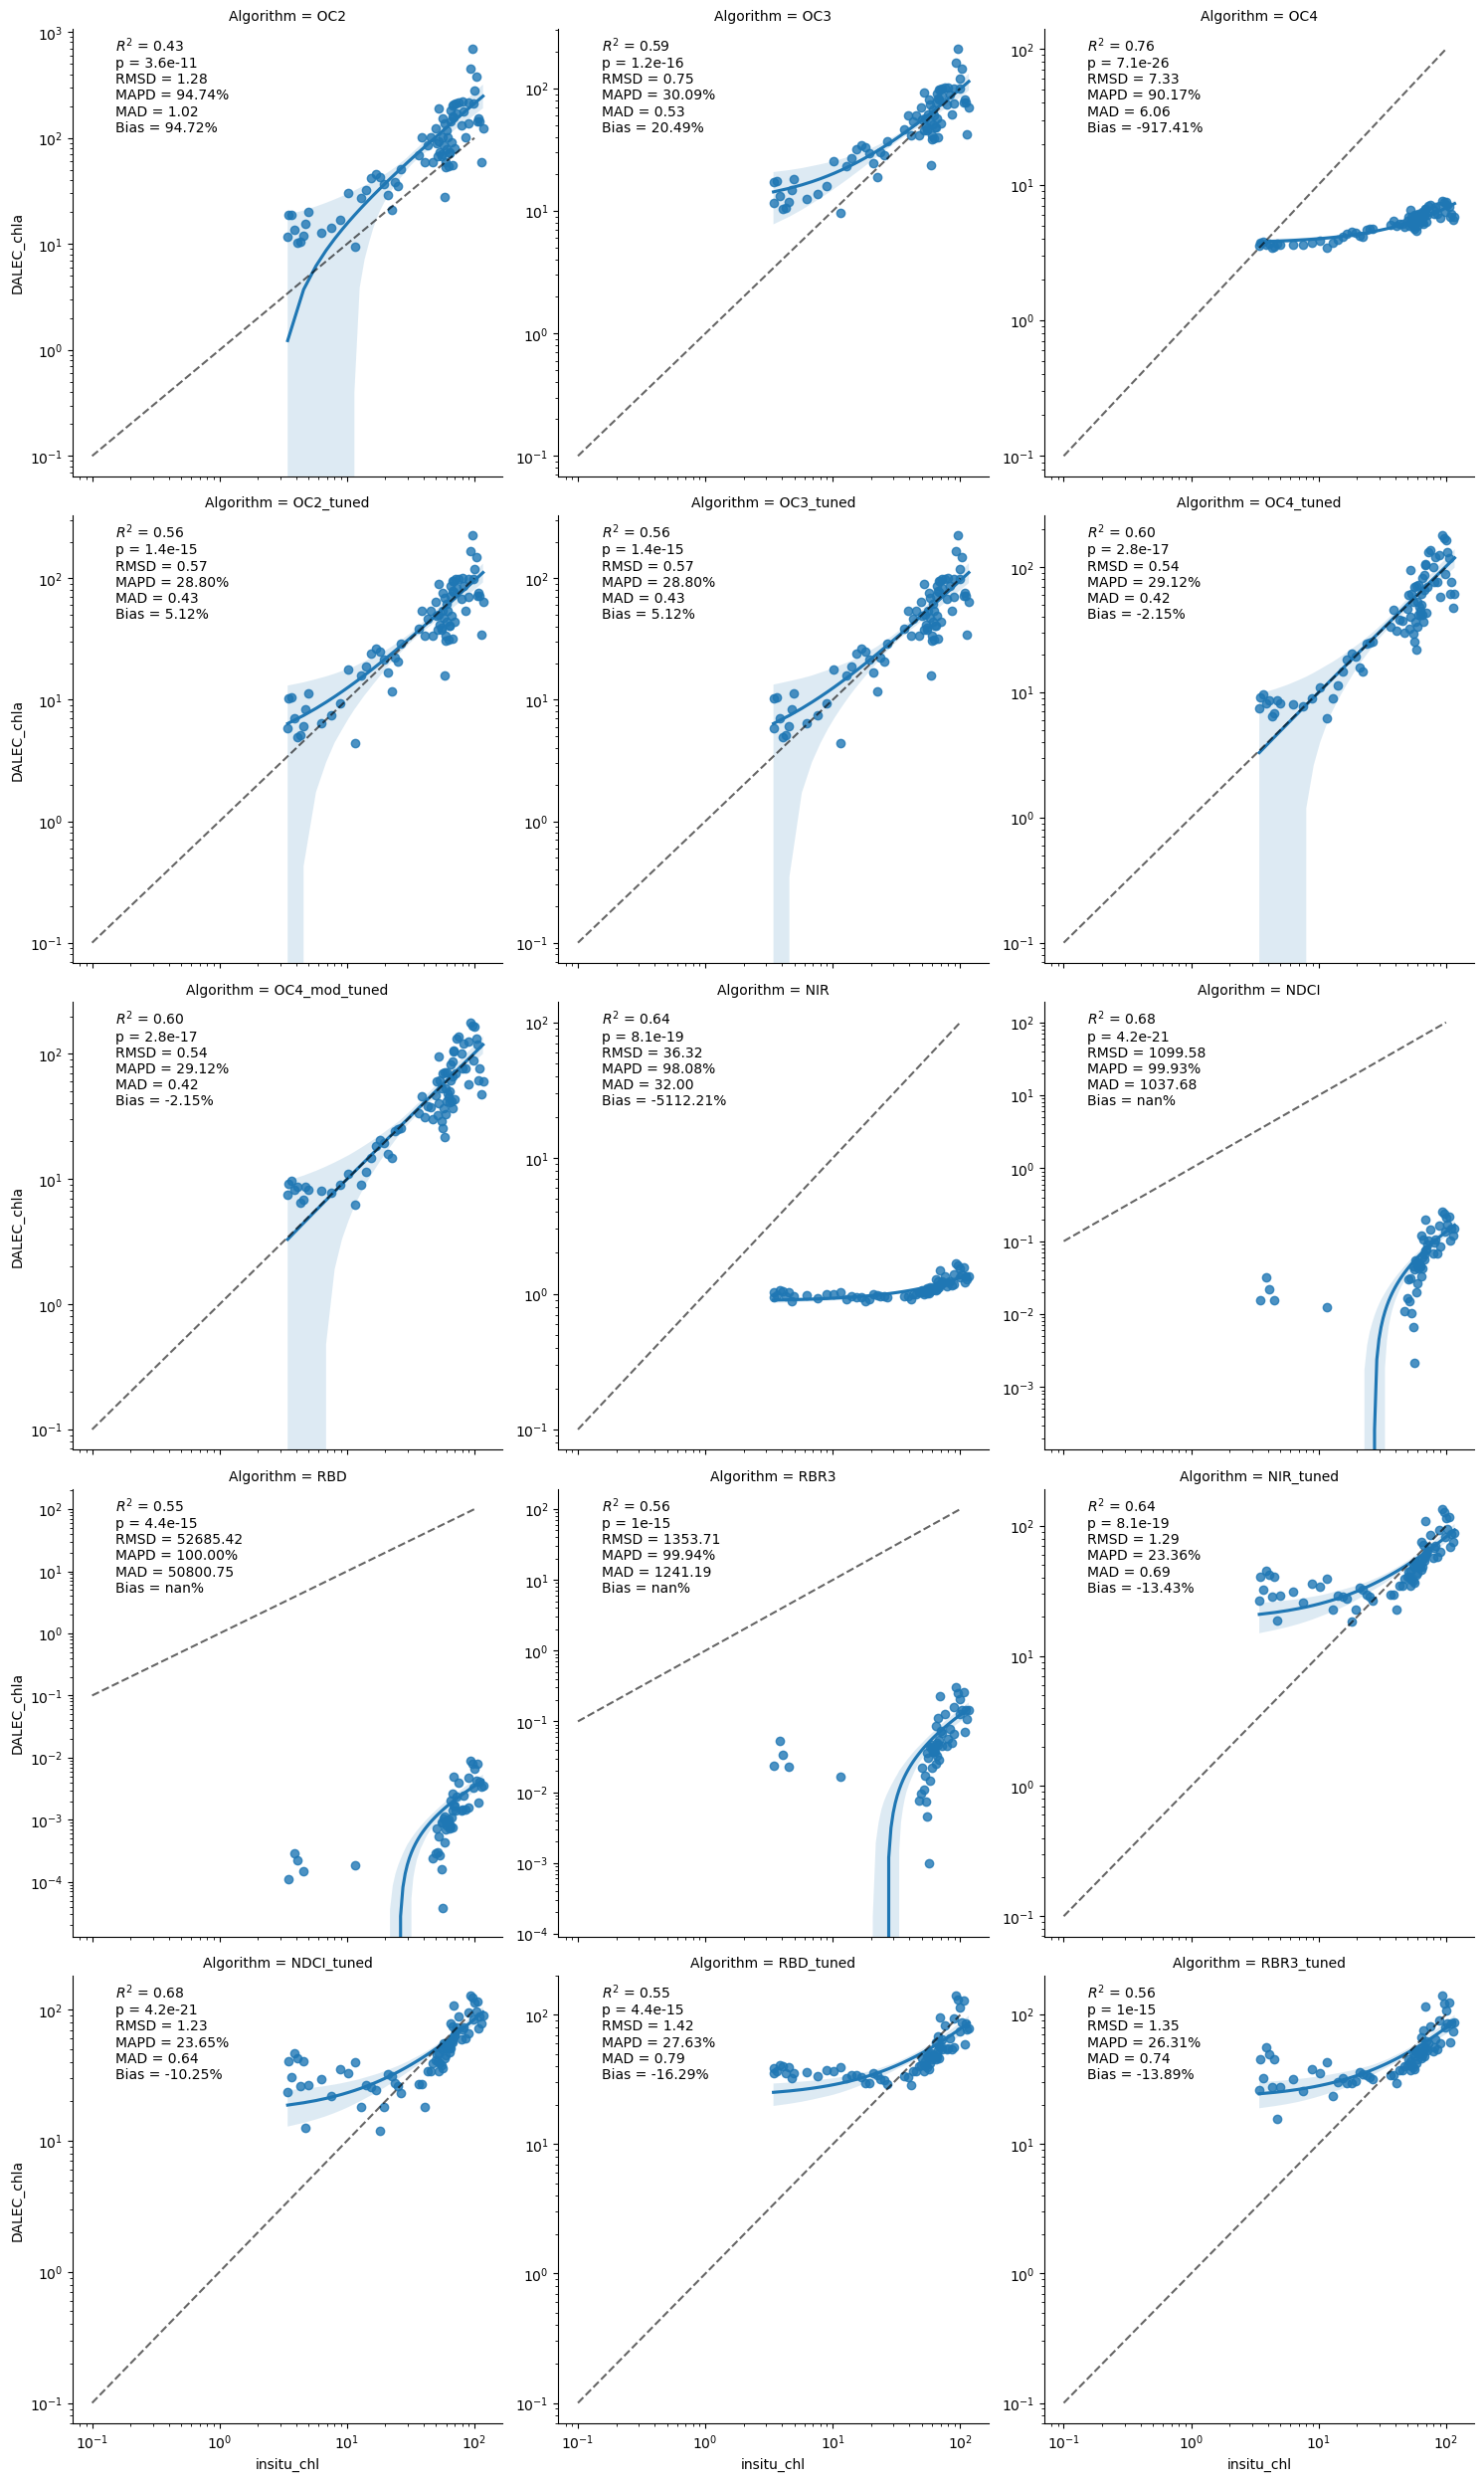

In [53]:
g = sns.lmplot(data=dalec_insi_melt,
               x='insitu_chl', y='DALEC_chla',
               col='Algorithm', col_wrap=3,
               facet_kws={'sharey':False, 'sharex':True})
#g.map_dataframe(sns.scatterplot, x='insitu_chl', y='DALEC_chla', hue='year')
g.map_dataframe(annotate, x='insitu_chl', y='DALEC_chla', plot=True)

for ax in g.axes:
    ax.set_yscale('log')
    ax.set_xscale('log')
plt.show()

In [54]:
#     a=0.3255, b=-2.7677,
#              c=2.4409, d=-1.1288, e=-0.4990, 

In [55]:
OC_coeff = {}
RBI_coeff = {}

for OC in ['OC2_X', 'OC3_X', 'OC4_X', 'OC4_mod_X']:
    OC_coeff[OC[:-2] + '_tuned'] = OC_linfit(dalec_insi_2023,
                                                 OC, chla_name='insitu_chl',
                                                  #regrModel=Ridge, 
                                             returnCoeff=True,
                                                  #alpha=0.2
#                                                 bounds=([-np.inf, 0, -0, -np.inf, -0.0000000001],
#                                                         [0, np.inf, np.inf, 0, 0]),
#                                                 p0=[0.2424, -2.2146, 2.4409, -1.12, -0.499],
#                                                 method='trf', preventOverfit=True
                                                  )
    
for RBI in ['NDCI', 'NIR', 'RBD', 'RBR3']:
    RBI_coeff[RBI + '_tuned'] = RBI_polyfit(dalec_insi_2023,
                                            RBI, chla_name='insitu_chl',
                                            returnCoeff=True)

Note that the DALEC coefficients for OC2 and OC3 are the same, because the 444nm band is never high with the DALEC data. This means OC2 and OC3 are equivalent for the DALEC

In [ ]:
OC_coeff = {}
RBI_coeff = {}

for OC in ['OC2_X', 'OC3_X', 'OC4_X', 'OC4_mod_X']:
    OC_coeff[OC[:-2] + '_tuned'] = OC_linfit(dalec_insi_2023,
                                                 OC, chla_name='insitu_chl',
                                                  #regrModel=Ridge, 
                                             returnCoeff=True,
                                                  #alpha=0.2
#                                                 bounds=([-np.inf, 0, -0, -np.inf, -0.0000000001],
#                                                         [0, np.inf, np.inf, 0, 0]),
#                                                 p0=[0.2424, -2.2146, 2.4409, -1.12, -0.499],
#                                                 method='trf', preventOverfit=True
                                                  )
    
for RBI in ['NDCI', 'NIR', 'RBD', 'RBR3']:
    RBI_coeff[RBI + '_tuned'] = RBI_polyfit(dalec_insi_2023,
                                            RBI, chla_name='insitu_chl',
                                            returnCoeff=True)

In [56]:
OC_coeff

{'OC2_tuned': array([-4.97291472, -0.73552331]),
 'OC3_tuned': array([-4.97291472, -0.73552331]),
 'OC4_tuned': array([-14.37530477,  -0.2260772 ]),
 'OC4_mod_tuned': array([-14.37530477,  -0.2260772 ])}

In [57]:
RBI_coeff

{'NDCI_tuned': array([366.77378511,  35.02473236]),
 'NIR_tuned': array([ 146.74873679, -110.94749657]),
 'RBD_tuned': array([11666.33727364,    37.40631738]),
 'RBR3_tuned': array([333.01216992,  37.5657016 ])}

In [58]:
dalec_insi_2023['OC4_X']


16   -0.139627
17   -0.153286
18   -0.140026
19   -0.135577
20   -0.144069
        ...   
91   -0.080753
92   -0.079098
93   -0.084303
94   -0.076516
95   -0.082518
Name: OC4_X, Length: 80, dtype: float64

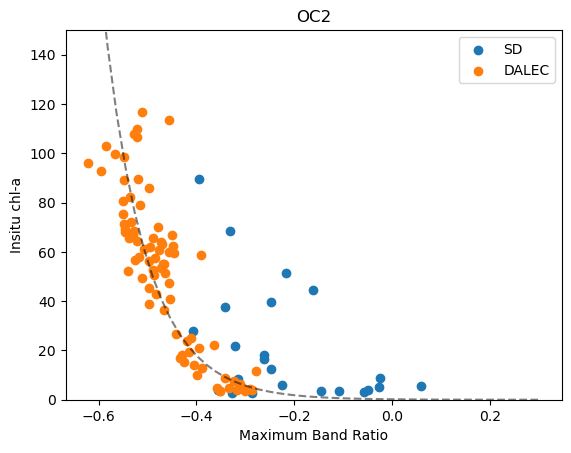

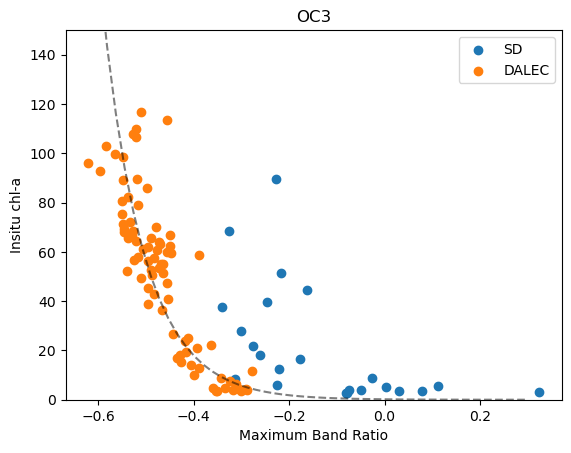

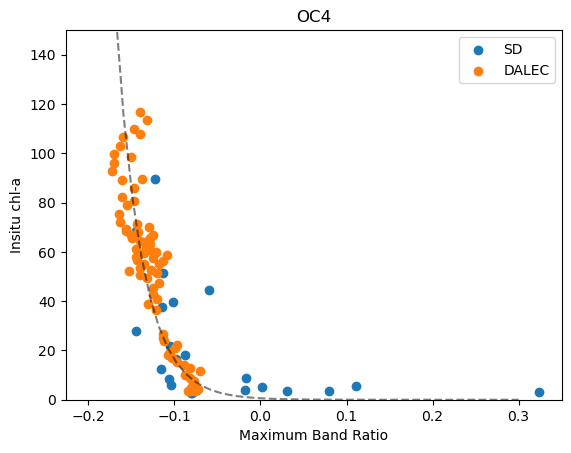

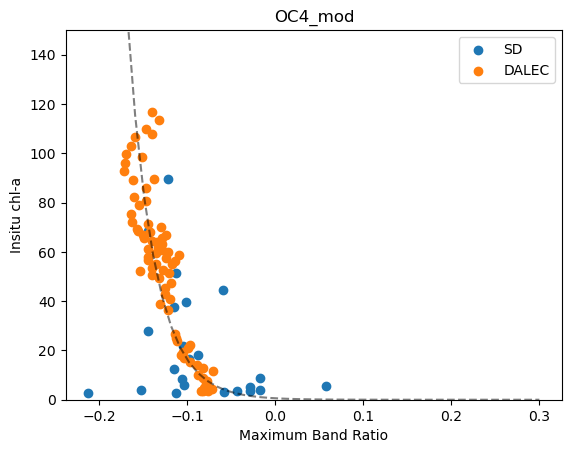

In [59]:
for OC, xmin in zip(['OC2', 'OC3', 'OC4', 'OC4_mod'], [-0.6, -0.6, -0.2, -0.2]):
    X = np.linspace(xmin, 0.3)
    Y = 10**(np.polyval(OC_coeff[OC+'_tuned'], X))
    Y_OC = 10**(np.polyval(OC_coeff[OC+'_tuned'], insit_reduced[OC+'_X']))
    Y_OC_dalec = 10**(np.polyval(OC_coeff[OC+'_tuned'], dalec_insi_2023[OC+'_X']))

    plt.plot(X, Y, 'k--', alpha=0.5)
    plt.scatter(insit_reduced[OC+'_X'], insit_reduced['Chl-a'], label='SD')
    plt.scatter(dalec_insi_2023[OC+'_X'], dalec_insi_2023['insitu_chl'], label='DALEC')

#     plt.yscale('log')
    # plt.xscale('log')
    plt.ylim(0, 150)
    plt.xlabel('Maximum Band Ratio')
    plt.ylabel('Insitu chl-a')
    plt.title(OC)
    plt.legend()
    plt.show()

In [209]:
for OC in ['OC2', 'OC3', 'OC4', 'OC4_mod']:
    insit_reduced[OC + '_tuned_dalec'] = 10**(np.polyval(OC_coeff[OC+'_tuned'],
                                                              insit_reduced[OC + '_X']))
    
for RBI in ['NIR', 'RBD', 'RBR3', 'NDCI']:
    insit_reduced[RBI + '_tuned_dalec'] = (np.polyval(RBI_coeff[RBI+'_tuned'],
                                                              insit_reduced[RBI]))

In [80]:
for OC in ['OC2', 'OC3', 'OC4', 'OC4_mod']:
    sd_chla[OC + '_tuned_dalec'] = 10**(np.polyval(OC_coeff[OC+'_tuned'],
                                                              sd_chla[OC + '_X']))
    
for RBI in ['NIR', 'RBD', 'RBR3', 'NDCI']:
    sd_chla[RBI + '_tuned_dalec'] = (np.polyval(RBI_coeff[RBI+'_tuned'],
                                                              sd_chla[RBI]))

In [667]:
insit_melt = insit_reduced.melt(value_vars=['OC2_tuned_dalec', 'OC3_tuned_dalec',
                                            'OC4_tuned_dalec', 'OC4_mod_tuned_dalec',
                                            'NIR_tuned_dalec',
                                            'NDCI_tuned_dalec', 'RBD_tuned_dalec',
                                            'RBR3_tuned_dalec'],
                                id_vars=['Date',
                                          'Chl-a',
                                          'sd_date',
                                          'sd_date_diff'],
                                value_name='SD_chla',
                                var_name='Algorithm')

# need to do dalec tuning with some regularisation i think

- when I tune the OC algs to the DALEC data, we get some really large coefficients which means that these tuned algorithms fail for the SD data, which has some values of OC_X which are outside the the training range
- eg. coeffs in the 1000s, when the original NASA ones are all between -3 and 10 ish
- I think if I use some form of regularisation when tuning the dalec data, we can fix this
- to do this, I can use `sklearn.PolynomialFeatures(degree=4).fit_transform(OC_X)`
- followed by sklearn lasso, ridge, or elastic_net regression on the transformed variable
- obviously we'll need to then tune the penalisation (alpha) term, but I think this is quite easy
- hopefully this will work and prevent overfitting in a sensible, and justifiable way.

I think Ridge regression is best as it is better for retaining all parameters, but shrinking them. Whereas Lasso regression will remove params which it thinks aren't useful. 

We know that all the params are useful, as they are just squares, cubes of each other etc. therefore, they should all be correlated with chl-a, but we need to make sure that the coeffs aren't too large. Therefore Ridge Regression is best. Should do cross val to optimise alpha parameter.


## issue with cross val on dalec data is that alpha is too small

- superdoves data is inherently different from dalec data, so we can't really expect that what isn't 'overfit' for dalec data will be a good fit for SDs
- I think a viable solution is to use the original OC coeffs as guides for expected ranges of coeffs. then select an alpha which gives coeffs within some pre-defined range, not too far from the original OC coeffs
- I could also force the coeffs to have the same signs as the NASA ones (try that!) +, -, +, -, -

- OC4
    - a=0.3255, b=-2.7677, c=2.4409, d=-1.1288, e=-0.4990
    
    
- OC3:
    - a=0.2424, b=-2.2146, c=1.5193, d=-0.7702, e=-0.4291

- OC2:
    - a=0.2389, b=-1.9369, c=1.7627, d=-3.0777, e=-0.1054
    

## forcing coeffs     
- hard to force the coeffs this well, and it seems that reaching an optimal alpha possibly doesn't work
- think cross val is possibly the best approach, unless I want to try 

# how is it actually done for OC 2, 3 4 ???

- this paper details the methods: https://www.sciencedirect.com/science/article/pii/S003442571930166X
- few interesting points:
    - they use what is effectively type 2 linear regression, assuming errors in x and y (Reduced major axis)
    - they use 'Clear water anchor points', _to extrapolate and anchor the curve below the lowest measured CHL_
        - _(the) value for the clear water CHL was operationally defined to be the CHL that yielded smooth, extrapolated model curves with monotonically decreasing modeled CHL with increasing MBR_
        - ^ this is basically what I was trying to do by adding dummy points outside the DALEC's training range! 

# what if I just forget about the 4th order polynomial?
- looking at the OC curves  me it looks like a linear model would fit the data pretty well in the range between 3 - 100 ug/L
- I think this could work!

In [204]:
insit_reduced

,Date,Chl-a,OC4_X,sd_date,sd_date_diff,OC4_mod_X,OC3_X,OC2_X,OC4,OC3,OC2,NIR,NDCI,RBD,RBR3,year,OC2_tuned,OC3_tuned,OC4_tuned,OC4_mod_tuned
0,2022-07-05,2.663,-0.081279,2022-07-04,1 days,-0.212219,-0.081279,-0.326859,3.691191,2.709150,14.675328,1.791180,0.283457,0.002836,1.875078,2022,13.067515,5.679126,10.155052,2.501772
1,2022-07-07,2.592,-0.079599,2022-07-07,0 days,-0.113131,-0.079599,-0.286753,3.646029,2.683347,10.259105,2.161116,0.367312,0.003419,2.876621,2022,12.934334,5.606760,9.855876,19.604706
2,2022-07-20,6.163,-0.104066,2022-07-10,10 days,-0.104066,-0.225913,-0.225913,4.376936,6.729931,6.333522,1.776907,0.279774,0.002646,2.085418,2022,14.553173,23.231614,16.453769,17.957663
4,2022-08-04,8.361,-0.106216,2022-08-10,6 days,-0.106216,-0.314552,-0.314552,4.449388,12.855899,13.101437,1.703827,0.260308,0.003312,1.072435,2022,12.736993,30.783651,17.358021,18.380255
5,2022-08-19,37.789,-0.114873,2022-08-20,1 days,-0.114873,-0.341299,-0.341299,4.756274,15.849414,16.835125,2.224479,0.379745,0.009289,1.109193,2022,13.994219,25.048179,21.858380,19.872773
6,2022-08-25,89.650,-0.122245,2022-08-27,2 days,-0.122245,-0.227783,-0.393995,5.038079,6.817507,28.930238,2.043424,0.342845,0.015878,1.553680,2022,31.446948,23.601530,27.136802,20.776023
8,2022-09-09,16.429,-0.098161,2022-09-10,1 days,-0.098161,-0.177696,-0.262719,4.185234,4.872957,8.408756,1.513492,0.204294,0.003322,0.671629,2022,13.628902,14.497224,14.310613,16.728161
9,2022-09-12,21.707,-0.104921,2022-09-12,0 days,-0.104921,-0.276199,-0.322066,4.405582,9.631687,14.035617,1.576755,0.223830,0.003531,0.631070,2022,12.897357,31.446698,16.804742,18.127707
10,2023-04-03,8.825,-0.017216,2023-04-03,0 days,-0.017216,-0.026196,-0.026196,2.365253,2.002032,1.953912,1.533752,0.210657,0.001890,0.964214,2023,3.795184,4.127781,4.998368,4.438815
12,2023-04-14,5.158,0.002026,2023-04-14,0 days,-0.028292,0.002026,-0.028292,2.088828,1.729496,1.973240,1.266962,0.117762,0.001361,0.430301,2023,3.843954,3.827313,4.607980,5.190129


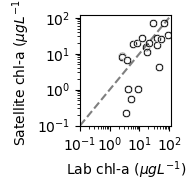

In [237]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
#sns.regplot(data=insit_reduced, x='Chl-a', y='OC4_tuned_dalec', color='k', ci=None)
sns.scatterplot(data=insit_reduced, x='Chl-a', y='OC4_tuned_dalec', color='k', marker="$\circ$")

plt.plot([.1, 100],[.1, 100], 'k--', alpha=0.5)
plt.ylim(.1, 120)
plt.xlim(.1, 120)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lab chl-a ($\mu gL^{-1}$)')
plt.ylabel('Satellite chl-a ($\mu gL^{-1}$)')
plt.tight_layout()

plt.savefig('images/sd_chla_match_up.pdf')

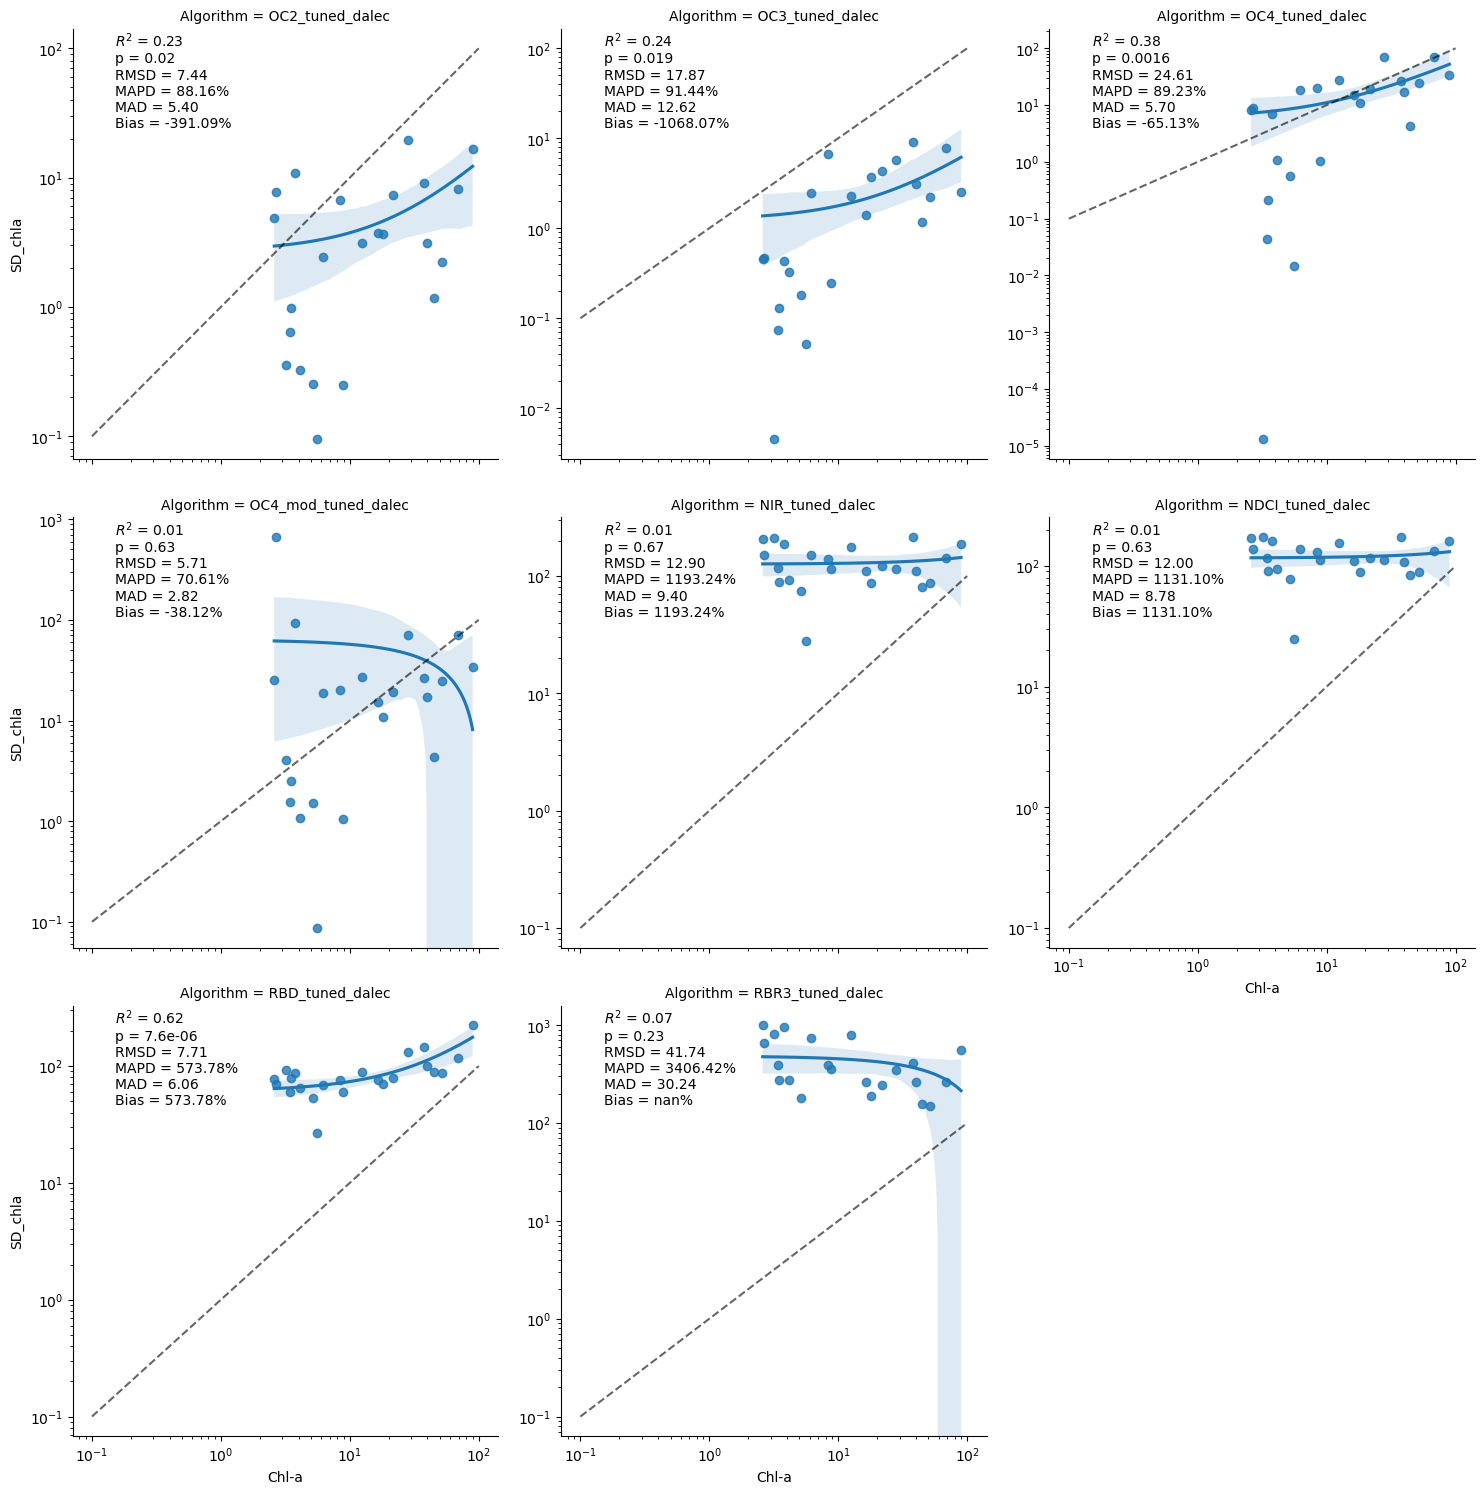

In [668]:
g = sns.lmplot(data=insit_melt,
               x='Chl-a', y='SD_chla',
               col='Algorithm', col_wrap=3,
               facet_kws={'sharey':False, 'sharex':True})
#g.map_dataframe(sns.scatterplot, x='insitu_chl', y='DALEC_chla', hue='year')
g.map_dataframe(annotate, x='Chl-a', y='SD_chla', plot=True)

for ax in g.axes:
# #     ax.set_ylim(0.01, 120)
    ax.set_yscale('log')
    ax.set_xscale('log')
plt.show()

In [94]:
sd_chla.columns

Index(['Date', 'date', 'Rrs_708', 'Rrs_666', 'Rrs_444', 'Rrs_492', 'Rrs_533',
       'Rrs_566', 'Rrs_866', 'NIR', 'NDCI', 'OC4_X', 'OC4_mod_X', 'OC3_X',
       'OC2_X', 'OC4', 'OC3', 'OC2', 'RBD', 'RBR3', 'insitu_chla',
       'insitu_date', 'insitu_date_diff', 'insitu_chl_clean',
       'OC2_tuned_dalec', 'OC3_tuned_dalec', 'OC4_tuned_dalec',
       'OC4_mod_tuned_dalec', 'NIR_tuned_dalec', 'RBD_tuned_dalec',
       'RBR3_tuned_dalec', 'NDCI_tuned_dalec'],
      dtype='object')

In [191]:
sd_chla_plt = sd_chla[sd_chla.date.dt.year==2023].groupby('date').median()#.resample('1d').interpolate('linear')
sd_chla_plt.reset_index(inplace=True)

In [193]:
sd_chla_plt

,date,Date,Rrs_708,Rrs_666,Rrs_444,Rrs_492,Rrs_533,Rrs_566,Rrs_866,NIR,...,insitu_date_diff,insitu_chl_clean,OC2_tuned_dalec,OC3_tuned_dalec,OC4_tuned_dalec,OC4_mod_tuned_dalec,NIR_tuned_dalec,RBD_tuned_dalec,RBR3_tuned_dalec,NDCI_tuned_dalec
0,2023-04-03,2023-04-03 10:50:31+00:00,0.005483,0.003608,0.004078,0.004411,0.004494,0.004672,0.009833,1.519961,...,0 days,8.825,0.244698,0.244698,1.037247,1.037247,112.104887,59.281613,348.186690,110.695009
1,2023-04-07,2023-04-07 10:29:28+00:00,0.003343,0.001627,0.004205,0.002103,0.002280,0.003052,0.007562,2.074190,...,4 days,8.825,1.262395,0.038301,0.007241,43.937046,193.437255,57.430222,851.377253,162.878135
2,2023-04-08,2023-04-08 11:01:19+00:00,0.008260,0.008446,0.010249,0.009644,0.009283,0.008406,0.011561,0.977943,...,5 days,8.825,0.092832,0.068593,0.034366,0.082416,32.564446,35.232907,27.285176,30.934714
3,2023-04-14,2023-04-14 10:45:04.500000+00:00,0.006478,0.004585,0.006124,0.004678,0.004187,0.004714,0.011556,1.431327,...,0 days,5.158,0.180603,0.093124,0.277843,0.820028,99.097948,59.493730,303.100535,98.706686
4,2023-04-15,2023-04-15 10:24:33+00:00,0.004997,0.002580,0.003776,0.003175,0.003426,0.004497,0.009401,1.936809,...,1 days,5.158,1.039059,0.438772,7.343912,29.615527,173.276804,65.604487,624.449171,152.021455
5,2023-04-18,2023-04-18 11:05:51+00:00,0.016415,0.006631,0.020232,0.008803,0.008797,0.011459,0.033085,2.389069,...,4 days,5.158,1.076173,0.014740,0.000699,277.460937,239.645346,151.548138,974.210540,176.700503
6,2023-04-19,2023-04-19 11:06:31+00:00,0.004361,0.002941,0.004428,0.002961,0.003527,0.003373,0.009895,1.482976,...,5 days,5.158,0.351159,0.047477,0.011863,0.312738,106.677311,53.975821,402.511771,106.367686
7,2023-04-20,2023-04-20 10:24:54+00:00,0.005853,0.004075,0.006283,0.005614,0.005359,0.006122,0.010188,1.458181,...,5 days,3.189,0.297668,0.173922,0.586124,2.621067,103.038770,58.157129,309.534338,102.892505
8,2023-04-21,2023-04-21 11:01:33+00:00,0.004304,0.002329,0.004401,0.003859,0.003697,0.003828,0.009167,1.848305,...,4 days,3.189,0.205842,0.095341,0.089023,0.823628,160.288959,60.919617,639.233067,144.260257
9,2023-04-22,2023-04-22 11:03:21+00:00,0.008580,0.003896,0.010205,0.004232,0.003235,0.004837,0.016716,2.202280,...,3 days,3.189,0.357317,0.004490,0.000013,4.056176,212.234324,92.049245,817.627400,172.728120


/var/folders/90/q80625gx5215cctg3hvm820r0000gn/T/ipykernel_68590/4251266320.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Apr", 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct'])


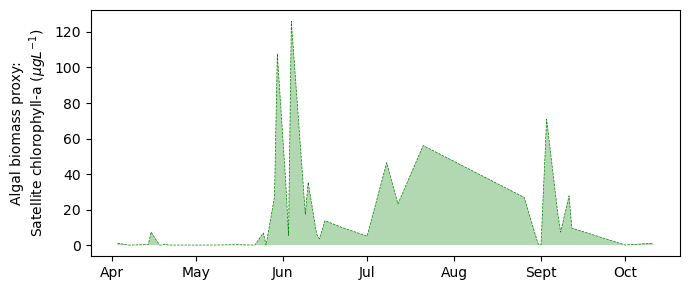

In [202]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
# sns.lineplot(data=sd_chla[sd_chla.date.dt.year==2023],
#              x='date', y='OC4_tuned_dalec',
#              estimator='median', errorbar=lambda x: (x.median()*0.1, x.median()*2.25),
#              marker=None, ax=ax,
#              markersize=4, linewidth=1, linestyle='-')
# plt.grid(alpha=0.5)

plt.plot(sd_chla_plt[sd_chla_plt.date.dt.year==2023].date,
         sd_chla_plt[sd_chla_plt.date.dt.year==2023].OC4_tuned_dalec,
         linestyle='--', linewidth=0.5, color='g')
# plt.errorbar(sd_chla[sd_chla.date.dt.year==2023].date,
#              sd_chla[sd_chla.date.dt.year==2023].OC4_tuned_dalec, 
#              yerr=10, #uplims=True
#              )

plt.fill_between(sd_chla_plt[sd_chla_plt.date.dt.year==2023].date,
                 (sd_chla_plt[sd_chla_plt.date.dt.year==2023].OC4_tuned_dalec),
                 0,
                 #(sd_chla_plt[sd_chla_plt.date.dt.year==2023].OC4_tuned_dalec)+5,
                 alpha=0.3, color='g', edgecolor=None)


ax.set_ylabel('Algal biomass proxy:\nSatellite chlorophyll-a ($\mu g L^{-1}$)')

ax.set_xticklabels(["Apr", 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct'])
plt.tight_layout()

plt.savefig('images/sd_chla_timeseries_2023.pdf')

In [85]:
sd_chla.date.dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
102    2023
103    2023
104    2023
105    2023
106    2023
Name: date, Length: 107, dtype: int32

In [649]:
OC_coeff['OC4_tuned']



array([-9.99999972e-11, -4.13513248e-19, -9.99999967e-14, -1.43753048e+01,
       -2.26077203e-01])

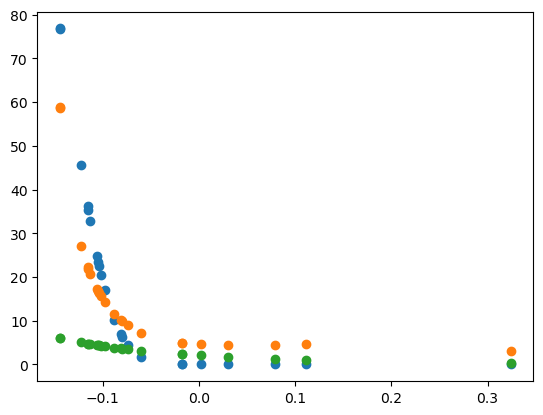

In [775]:
plt.scatter(insit_reduced.OC4_X, insit_reduced.OC4_tuned_dalec)
plt.scatter(insit_reduced.OC4_X, insit_reduced.OC4_tuned)
plt.scatter(insit_reduced.OC4_X, insit_reduced.OC4)

# plt.scatter(np.linspace(-0.15, 0.3, 100),
#             10**(np.polyval([-1, -1, 2, -3, 1.], np.linspace(-0.15, 0.3, 100))))

In [495]:
insi_sd_daily = sd_chla.merge(insitu_chl_daily, on='date').dropna()
insi_sd_daily

,Date,date,Rrs_708,Rrs_666,Rrs_444,Rrs_492,Rrs_533,Rrs_566,Rrs_866,NIR,...,OC4,OC3,OC2,RBD,RBR3,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean,insitu_chl
0,2022-07-07 11:04:17+00:00,2022-07-07,0.006363,0.002944,0.004347,0.002698,0.004024,0.005222,0.015765,2.161116,...,3.646029,2.683347,10.259105,0.003419,2.876621,2.592,2022-07-07,0 days,2.592,2.592000
1,2022-07-07 11:04:19+00:00,2022-07-07,0.006571,0.003255,0.004858,0.003176,0.004463,0.005780,0.015877,2.018376,...,3.537909,2.621223,8.230213,0.003315,2.460710,2.592,2022-07-07,0 days,2.592,2.592000
2,2022-07-10 11:01:52+00:00,2022-07-10,0.006052,0.003406,0.002885,0.003197,0.004233,0.005379,0.016246,1.776907,...,4.376936,6.729931,6.333522,0.002646,2.085418,2.592,2022-07-07,3 days,2.592,3.416077
7,2022-08-17 11:03:56+00:00,2022-08-17,0.013213,0.007231,0.004750,0.005847,0.010630,0.014072,0.013200,1.827235,...,5.021794,21.967918,25.274029,0.005982,0.826431,37.789,2022-08-19,2 days,37.789,33.865267
8,2022-08-17 11:03:58+00:00,2022-08-17,0.013056,0.007141,0.004552,0.005676,0.010482,0.013935,0.013104,1.828356,...,5.094084,23.610890,27.717044,0.005915,0.831391,37.789,2022-08-19,2 days,37.789,33.865267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2023-09-11 10:30:46+00:00,2023-09-11,0.017587,0.011256,0.013310,0.010090,0.014821,0.019363,0.031722,1.562393,...,4.802287,4.427998,9.943646,0.006331,1.014386,18.055,2023-09-12,1 days,18.055,19.483429
88,2023-09-12 10:32:01+00:00,2023-09-12,0.011000,0.008159,0.006929,0.008027,0.011972,0.014661,0.014455,1.348111,...,3.878483,8.660012,8.334089,0.002840,0.457469,18.055,2023-09-12,0 days,18.055,18.055000
89,2023-09-12 11:11:16+00:00,2023-09-12,0.011789,0.010263,0.008581,0.009497,0.013162,0.015803,0.013952,1.148686,...,3.641127,6.512005,6.115529,0.001526,0.175970,18.055,2023-09-12,0 days,18.055,18.055000
90,2023-10-01 11:10:51+00:00,2023-10-01,0.005363,0.003436,0.005670,0.003673,0.004422,0.004726,0.010202,1.560670,...,1.322016,1.192083,2.992391,0.001927,1.066555,3.424,2023-09-29,2 days,3.424,3.523143


In [353]:
insi_sd_daily = insi_sd_daily.groupby('date').median().reset_index()

In [354]:
insi_sd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   date        50 non-null     datetime64[ns]     
 1   Date        50 non-null     datetime64[ns, UTC]
 2   Rrs_708     50 non-null     float64            
 3   Rrs_666     50 non-null     float64            
 4   Rrs_444     50 non-null     float64            
 5   Rrs_492     50 non-null     float64            
 6   Rrs_533     50 non-null     float64            
 7   Rrs_566     50 non-null     float64            
 8   NIR         50 non-null     float64            
 9   NDCI        50 non-null     float64            
 10  OC4_X       50 non-null     float64            
 11  OC4_mod_X   50 non-null     float64            
 12  OC3_X       50 non-null     float64            
 13  OC2_X       50 non-null     float64            
 14  OC4         50 non-null     float64         

In [355]:
for OC in ['OC2_X', 'OC3_X', 'OC4_X', 'OC4_mod_X',]:
    insi_sd_daily[OC[:-2] + '_tuned'] = OC_polyfit(insi_sd_daily, OC, chla_name='insitu_chl', debug=True)

[ 2.02036578e+02  1.66632557e+02  3.96563239e+01 -3.40587390e-02
  6.73434100e-01]
0    -0.273398
1    -0.225913
2    -0.314552
3    -0.268812
4    -0.372164
5    -0.385735
6    -0.341299
7    -0.393995
8    -0.247060
9    -0.308923
10   -0.024957
11   -0.162249
12    0.059679
13    0.009488
14   -0.151252
15   -0.105633
16   -0.056511
17   -0.040524
18   -0.009865
19   -0.058030
20    0.058098
21   -0.146148
22    0.019059
23   -0.355862
24   -0.116168
25   -0.246869
26   -0.347362
27   -0.307489
28   -0.217293
29   -0.407692
30   -0.247011
31   -0.301243
32   -0.206774
33   -0.196711
34   -0.206026
35   -0.251344
36   -0.166353
37   -0.351587
38   -0.275553
39   -0.304585
40   -0.223520
41   -0.052410
42   -0.105816
43   -0.407315
44   -0.317836
45   -0.251792
46   -0.283068
47   -0.241371
48   -0.109445
49   -0.050434
Name: OC2_X, dtype: float64
0      2.592000
1      3.416077
2     20.132200
3     22.094067
4     26.017800
5     33.865267
6     46.432500
7     86.391143
8     18.18

In [356]:
sd_insi_daily_melt = insi_sd_daily.melt(value_vars=['OC4', 'OC3', 'OC2',
                                            'OC2_tuned', 'OC3_tuned',
                                            'OC4_tuned', 'NIR',
                                            'NDCI',],
                                id_vars=['date',
                                          'insitu_chl',
                                          ],
                                value_name='SD_chla',
                                var_name='Algorithm')

sd_insi_daily_melt

,date,insitu_chl,Algorithm,SD_chla
0,2022-07-07,2.592000,OC4,3.591969
1,2022-07-10,3.416077,OC4,4.376936
2,2022-08-10,20.132200,OC4,4.449388
3,2022-08-11,22.094067,OC4,3.677124
4,2022-08-13,26.017800,OC4,7.125115
...,...,...,...,...
395,2023-09-08,23.768714,NDCI,0.108442
396,2023-09-11,19.483429,NDCI,0.219480
397,2023-09-12,18.055000,NDCI,0.108725
398,2023-10-01,3.523143,NDCI,0.218954


In [357]:
sd_insi_daily_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        400 non-null    datetime64[ns]
 1   insitu_chl  400 non-null    float64       
 2   Algorithm   400 non-null    object        
 3   SD_chla     400 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.6+ KB


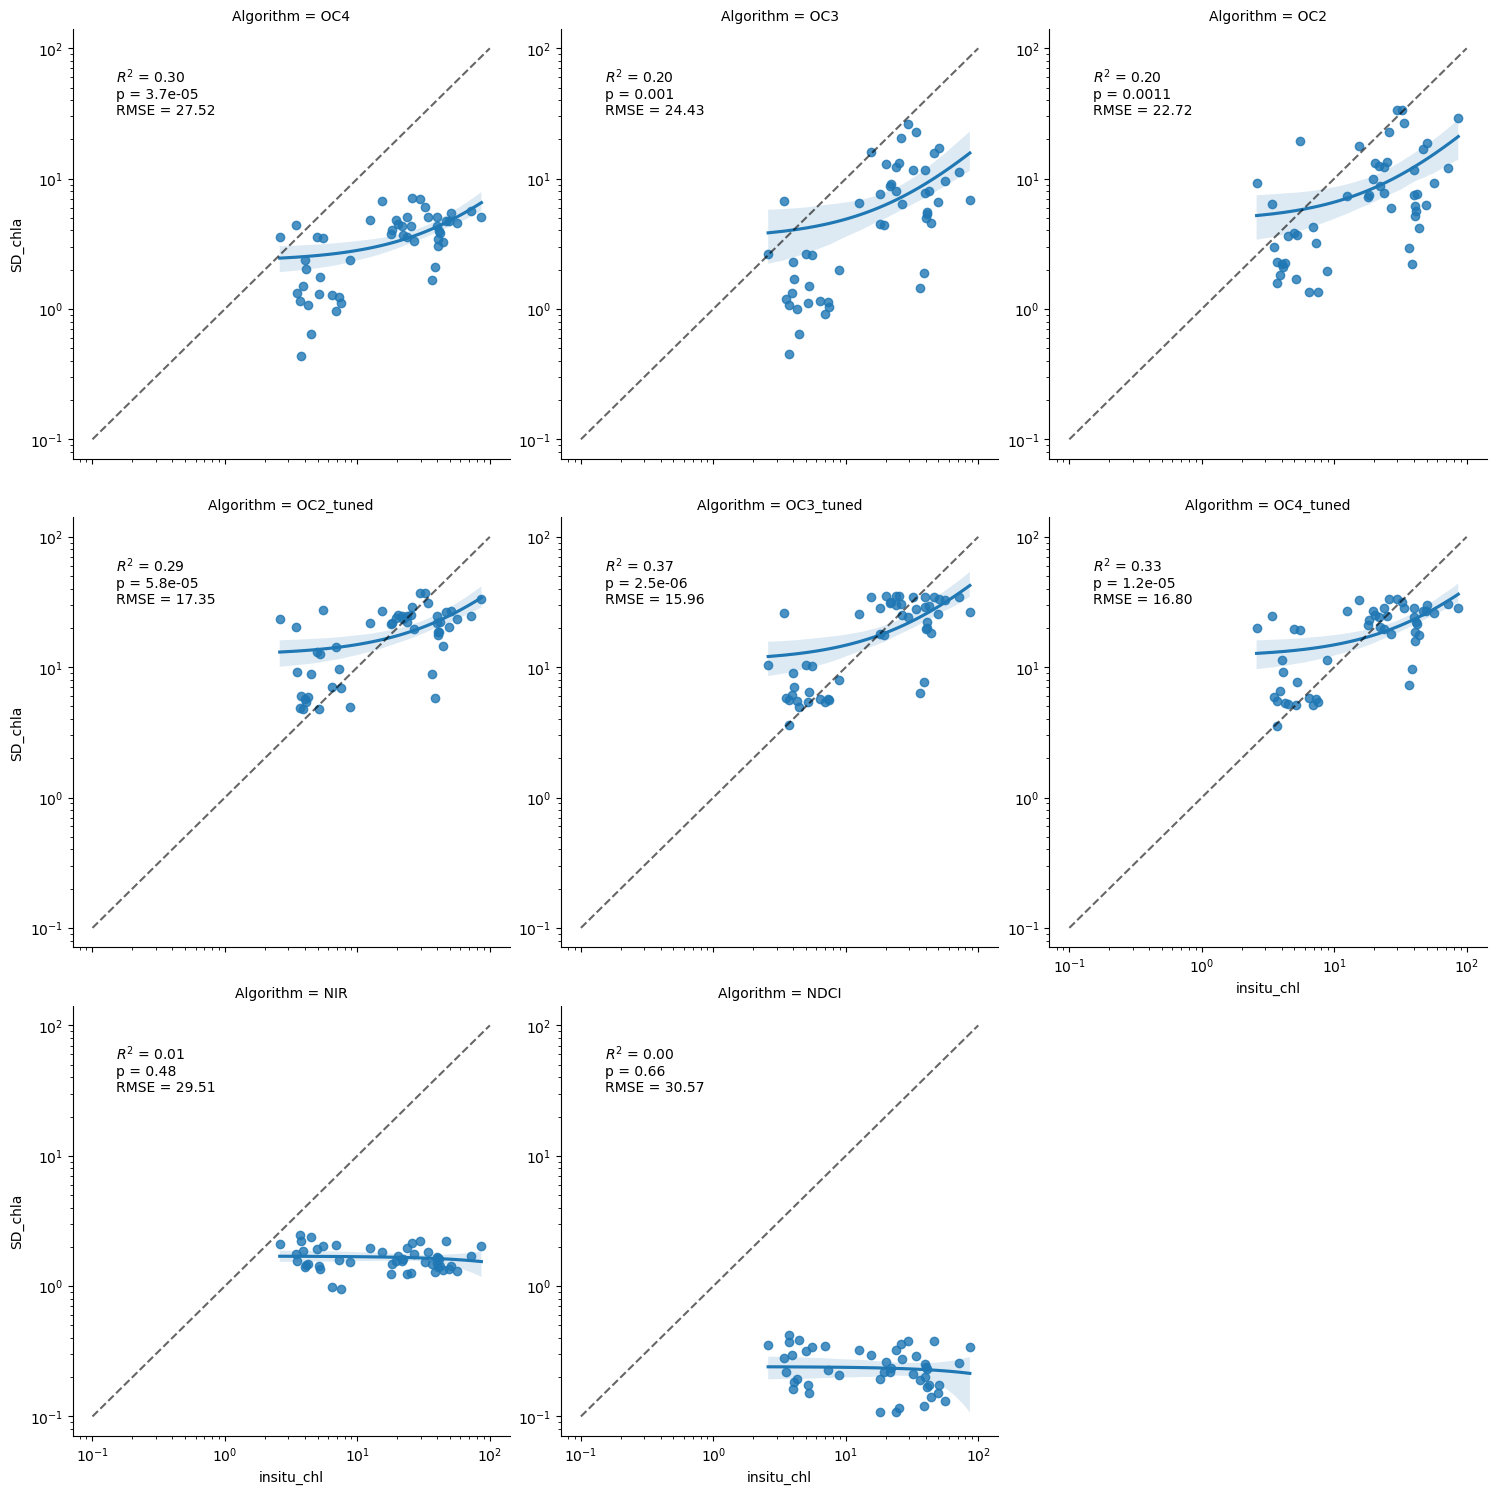

In [358]:
g = sns.lmplot(data=sd_insi_daily_melt,
               x='insitu_chl', y='SD_chla',
               col='Algorithm', col_wrap=3,
               facet_kws={'sharey':False, 'sharex':True})
#g.map_dataframe(sns.scatterplot, x='insitu_chl', y='DALEC_chla', hue='year')
g.map_dataframe(annotate, x='insitu_chl', y='SD_chla', plot=True)

for ax in g.axes:
    ax.set_yscale('log')
    ax.set_xscale('log')
plt.show()

In [111]:
insitu_chl

,Date,Chl-a,sd_chl-a_J_cal,sd_chl-a_J,sd_date,sd_date_diff
0,2022-07-05,2.663,16.012227,71.289327,2022-07-04,1 days
1,2022-07-07,2.592,36.448174,89.912786,2022-07-07,0 days
2,2022-07-20,6.163,13.767117,70.505395,2022-07-10,10 days
3,2022-07-27,5.465,18.063838,66.409166,2022-08-10,14 days
4,2022-08-04,8.361,18.063838,66.409166,2022-08-10,6 days
5,2022-08-19,37.789,96.897912,92.800150,2022-08-20,1 days
6,2022-08-25,89.650,121.577439,84.325807,2022-08-27,2 days
7,2022-09-01,78.244,121.577439,84.325807,2022-08-27,5 days
8,2022-09-09,16.429,13.584096,55.068166,2022-09-10,1 days
9,2022-09-12,21.707,16.583732,58.948442,2022-09-12,0 days


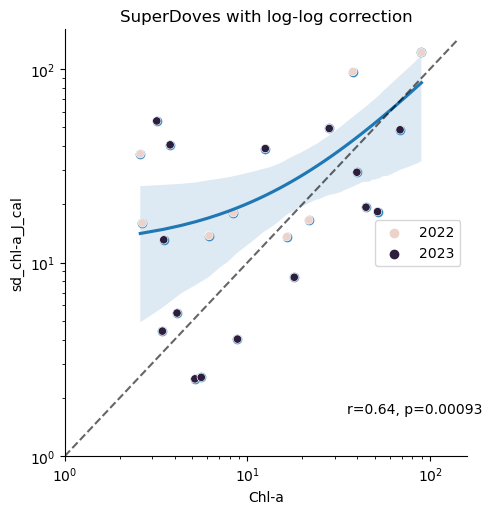

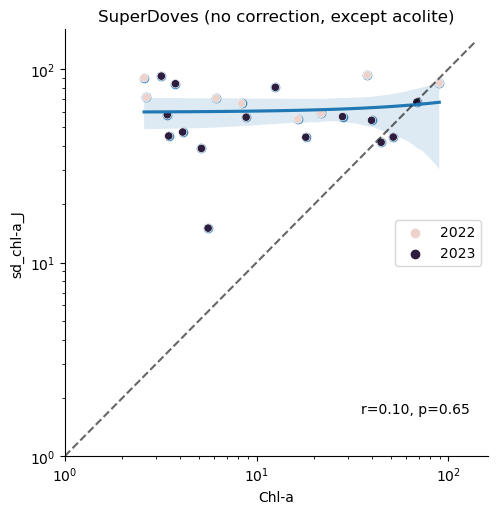

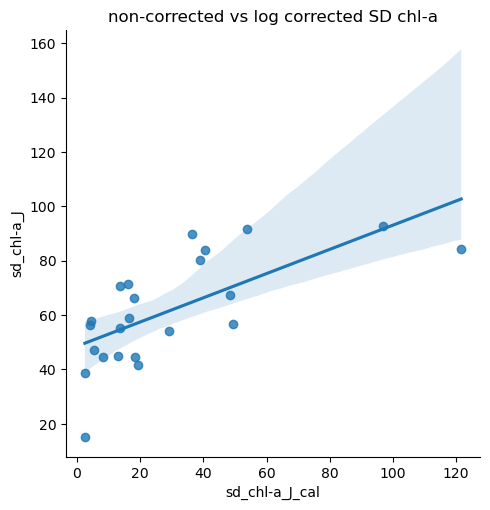

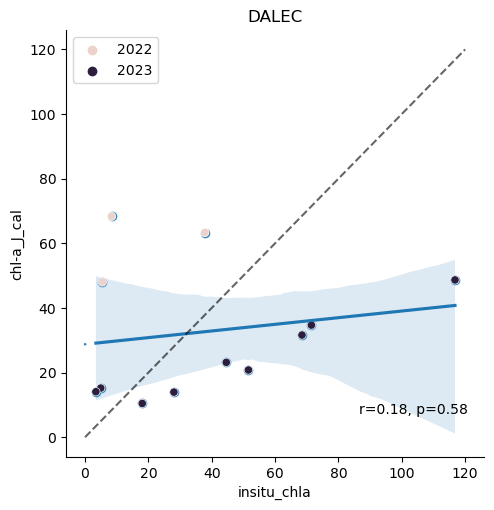

In [112]:
def annotate(data, x='insitu_chl_clean', y='chl-a_J_cal', order=1, plot=True, **kws):
    res = sp.stats.linregress(data.dropna()[x]**order, data.dropna()[y])
    ax = plt.gca()
    ax.text(0.7, 0.1, 'r={:.2f}, p={:.2g}'.format(res.rvalue, res.pvalue),
            transform=ax.transAxes)
    if plot:
        ax.plot([0.0001, 0.05],
                [res.intercept + res.slope*0.0001, res.intercept + res.slope*0.05])

g = sns.lmplot(data=insit_reduced, y='sd_chl-a_J_cal', x='Chl-a',
               legend=False)
sns.scatterplot(data=insit_reduced, y='sd_chl-a_J_cal', x='Chl-a',
                hue='year', 
                #style='date',
                legend=True)
g.map_dataframe(annotate, x='Chl-a', y='sd_chl-a_J_cal', plot=False)

plt.legend(loc='center right')
plt.plot([1, 140],[1, 140], 'k--', alpha=0.6)
plt.gca().set_title('SuperDoves with log-log correction')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1, 160)
plt.xlim(1, 160)

plt.show()

g = sns.lmplot(data=insit_reduced, y='sd_chl-a_J', x='Chl-a',
               legend=False)
sns.scatterplot(data=insit_reduced, y='sd_chl-a_J', x='Chl-a',
                hue='year', 
                #style='date',
                legend=True)
g.map_dataframe(annotate, x='Chl-a', y='sd_chl-a_J', plot=False)

plt.legend(loc='center right')
plt.plot([1, 140],[1, 140], 'k--', alpha=0.6)
plt.gca().set_title('SuperDoves (no correction, except acolite)')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1, 160)
plt.xlim(1, 160)

plt.show()

g = sns.lmplot(data=insit_reduced, y='sd_chl-a_J', x='sd_chl-a_J_cal',
               legend=False)
plt.title('non-corrected vs log corrected SD chl-a')

# sns.scatterplot(data=sd_chla, y='chl-a_J_cal', x='date',
#                     hue='date', style='date', legend=False)

    
#g.map_dataframe(annotate)

g = sns.lmplot(data=dalec_reduced, y='chl-a_J_cal', x='insitu_chla')
sns.scatterplot(data=dalec_reduced, y='chl-a_J_cal', x='insitu_chla',
                hue='year',
                #hue='month',
               )

g.map_dataframe(annotate, x='insitu_chla')
plt.plot([0, 120], [0, 120], 'k--', alpha=0.6)
plt.legend()
plt.gca().set_title('DALEC')
plt.show()

# Now SuperDoves is pretty good!

- I've averaged over a larger no. of pixels (20x20) (60x60 m)
    - think this helps a bit
- Using "log regression correction" of Rrs_666, Rrs_707
    - this seems to be really important, I so I wonder if this is justifiable...
- Think I need to understand why I have 2 superdoves points which are well above the line.
    - I have a note saying that there were large concs of windblown debris (algal and other floral) on the 7th of June 2023.
    - Notes from 19th Aug 2022 don't have any revealing details. I did note slight rain that day and presence of cyano communities..
    - image from 19th Aug looks good on precursory glance. Water is v green that day. Not much obvious spatial variation, and averaging over 400 pixels should avoid that anyways... 

In [113]:
insit_reduced[insit_reduced['sd_chl-a_J_cal']>100]

,Date,Chl-a,sd_chl-a_J_cal,sd_chl-a_J,sd_date,sd_date_diff,year
6,2022-08-25,89.65,121.577439,84.325807,2022-08-27,2 days,2022


In [114]:
dalec_chla.loc[dalec_chla.groupby('insitu_date').insitu_date_diff.idxmin()]

,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_J_cal_COR,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean
0,2022-07-28,0.006881,0.005111,345.352535,161.820021,44.256417,48.032450,2.877338,30.978225,5.465,2022-07-27,1 days,5.465
4,2022-08-03,0.006902,0.004405,286.552367,179.610246,58.337357,68.338391,8.225084,42.523879,8.361,2022-08-04,1 days,8.361
15,2022-08-15,0.012529,0.008285,300.317722,175.209828,54.984102,63.316156,20.686778,39.671626,37.789,2022-08-19,4 days,37.789
16,2023-07-08,0.012693,0.011963,433.833537,138.805661,23.948273,23.163608,2.503777,16.759689,44.595,2023-07-04,4 days,44.595
28,2023-07-20,0.012146,0.010448,400.766040,146.989370,31.435913,31.611369,3.678966,21.604715,68.487,2023-07-20,0 days,68.487
42,2023-08-03,0.013460,0.009947,343.395302,162.374000,44.716151,48.660970,13.014366,31.336204,116.800,2023-08-03,0 days,116.800
47,2023-08-08,0.008639,0.007212,389.640037,149.846070,33.981778,34.689721,2.478715,23.365556,71.458,2023-08-08,0 days,71.458
63,2023-08-25,0.009918,0.009620,443.976501,136.379638,21.675548,20.796372,3.372646,15.397542,51.580,2023-08-25,0 days,51.580
71,2023-09-06,0.010181,0.010866,476.714764,128.789576,14.422856,13.950078,6.023613,11.440653,28.054,2023-09-05,1 days,28.054
77,2023-09-12,0.004770,0.005409,496.591449,124.345268,10.088103,10.443974,26.638229,9.398362,18.055,2023-09-12,0 days,18.055


## so, is the chl-a algorithm working?

- I've been trying algorithms based on the NIR band ratio with bands 707, 666
- the results I get with dalec data show some promise:
    - there is a clear positive correlation, suggesting that with proper tuning we could probably get this algorithm to give good results.
- but, the planet data doesn't seem to work for this
    - no obvious correlation

## Options

- explore alternative algorithms:
    - if I assume my match up validation with DALEC data is good then I would need to find algorithms which only use the bands which fit well
    - I think the NIR ratio 707/666 isn't good with the planet data
    - Claire Neil's paper https://www.sciencedirect.com/science/article/pii/S0034425719301786#s0010 doesn't seem to look at any other algorithms which would work well with the bands which appear to be good.
    
- OR maybe the issue is that I need to exclude some planet images. 
    - think this should be the first port of call! - it might reduce the number of data points, but hopefully will massively improve my life.

### How to exclude / flag potentially bad images

- planet has udm2 data which provides masks for snow, shadow, light haze, heavy haze, cloud 
- these files are the `....udm2_clip.tif` files in the PSScene folders
- now, on inspection, it seems that these aren't perfect. 
    - they seem to catch large clouds and shadows, but miss smaller features which I can recognise by eye in the RGB images
    - so far, I haven't found any cases where the udm2 mask identifies features that I can't see by eye.
    - therefore, probably best to rely largely on visual inspection!
- but, for a paper it might be good to have done the cleaning of images using both udm2 and visual inspection (this just sounds more pro, and does provide a double check in some ways)


### Some other ideas
- Correct the SD to match the DALEC better using the linear regression coeffs from dalec-sd match up.
    - I've just quickly implemented this by adding m707, c707 etc to the Chl-a_J() method
    - this actually improves the superdoves fit to the in-situ chl-a, making it +ve. But still not statistically significant
    - looks like outliers are causing the poor fit issue. I wonder if these are pixels affected by macrophytes or something like that. might be worth looking at the outlier images themselves to see if I can identify the issue
- Interpolate the in-situ chl-a to daily values and get more points for the match ups


0     2022-07-05
1     2022-07-06
2     2022-07-07
3     2022-07-08
4     2022-07-09
         ...    
461   2023-10-09
462   2023-10-10
463   2023-10-11
464   2023-10-12
465   2023-10-13
Name: date, Length: 466, dtype: datetime64[ns]

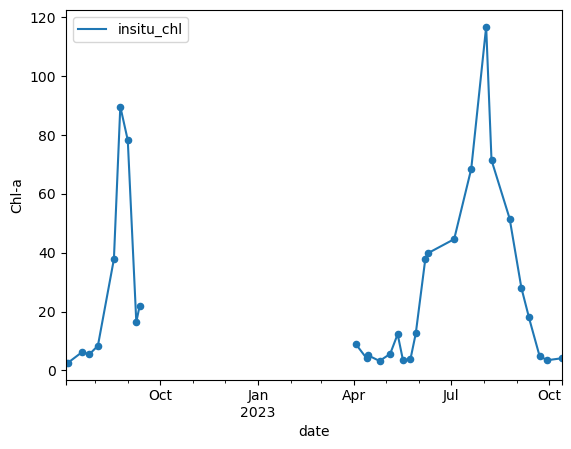

In [125]:
fig, ax = plt.subplots(1,1)
insitu_chl_daily = insitu_chl.copy().set_index('Date')
insitu_chl.plot(x='Date', y='Chl-a', ax=ax, kind='scatter')
#print(insitu_chl_daily.isna())
# 2022-09-12
# 2023-04-03
insitu_chl_daily = insitu_chl_daily.resample('1d').asfreq().reset_index()
insitu_chl_daily['Chl-a'] = insitu_chl_daily['Chl-a'].interpolate()#method='spline', order=3)
insitu_chl_daily.loc[(insitu_chl_daily['Date']>'2022-09-12') & (insitu_chl_daily['Date']<'2023-04-03'), 'Chl-a'] = np.nan
insitu_chl_daily.rename({'Date':'date', 'Chl-a':'insitu_chl'}, inplace=True, axis=1) 
insitu_chl_daily['date'] 
insitu_chl_daily.plot(x='date', y='insitu_chl', ax=ax)
insitu_chl_daily = insitu_chl_daily[['date', 'insitu_chl']]
insitu_chl_daily.date

### This looks good! 

- if I linearly interpolate insitu chl-a to daily values, and match up with DALEC data (ONLY 2023), then we get a strong correlation, which seems to follow a quadratic curve pretty well
- possibly the quadratic relationship might change if I change the interpolation from linear to something else

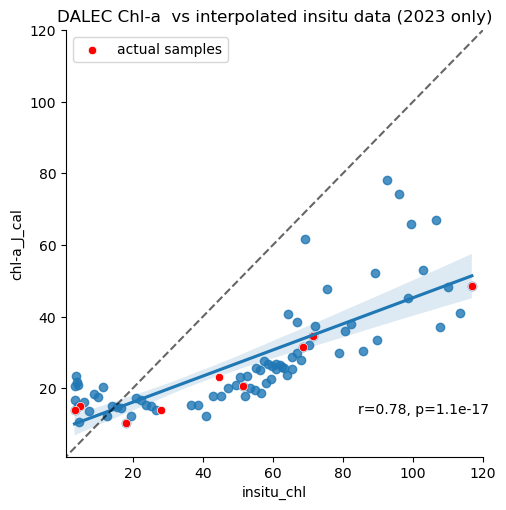

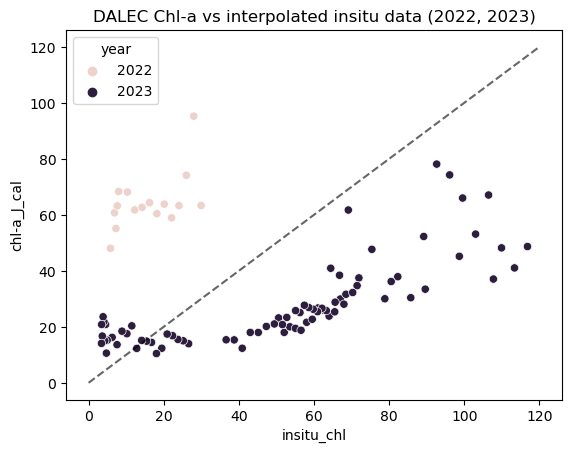

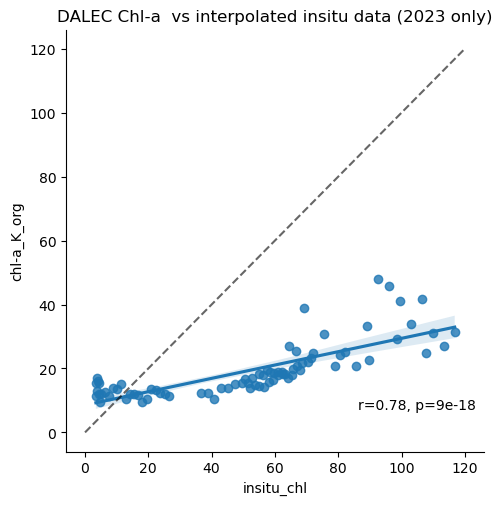

In [142]:
dalec_insi_daily = dalec_chla.merge(insitu_chl_daily, on='date')
dalec_insi_daily['year'] = dalec_insi_daily.date.dt.year
g = sns.lmplot(data=dalec_insi_daily[dalec_insi_daily.year==2023], x='insitu_chl', y='chl-a_J_cal', order=1,)
sns.scatterplot(data=dalec_reduced[dalec_reduced['year']==2023],
                y='chl-a_J_cal', x='insitu_chla',
                label='actual samples', color='r',
                #hue='month',
               )
g.map_dataframe(annotate, x='insitu_chl', y='chl-a_J_cal', plot=False,order=1)
plt.gca().plot([0, 120], [0, 120], 'k--', alpha=0.6)
plt.title('DALEC Chl-a  vs interpolated insitu data (2023 only)')
#plt.yscale('log')
#plt.xscale('log')
plt.xlim(1, 120)
plt.ylim(1, 120)
plt.legend()
plt.show()


#g = sns.lmplot(data=dalec_insi_daily, x='insitu_chl', y='chl-a_J_cal', hue='year', order=1)
g = sns.scatterplot(data=dalec_insi_daily, x='insitu_chl', y='chl-a_J_cal', hue='year')

#g.map_dataframe(annotate, x='insitu_chl', y='chl-a_J_cal', order=2)
plt.gca().plot([0, 120], [0, 120], 'k--', alpha=0.6)
plt.title('DALEC Chl-a vs interpolated insitu data (2022, 2023)')
plt.show()

g = sns.lmplot(data=dalec_insi_daily[dalec_insi_daily.year==2023], x='insitu_chl', y='chl-a_K_org', order=1)
g.map_dataframe(annotate, x='insitu_chl', y='chl-a_K_org', plot=False,order=1)
plt.gca().plot([0, 120], [0, 120], 'k--', alpha=0.6)
plt.title('DALEC Chl-a  vs interpolated insitu data (2023 only)')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlim(1, 120)
#plt.ylim(1, 120)

plt.show()

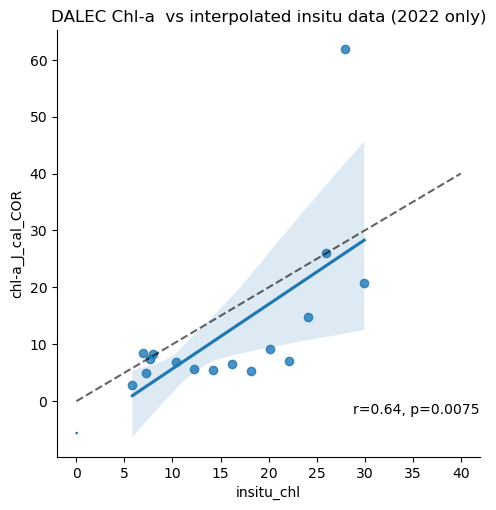

In [129]:
dalec_insi_daily = dalec_chla.merge(insitu_chl_daily, on='date')
dalec_insi_daily['year'] = dalec_insi_daily.date.dt.year
g = sns.lmplot(data=dalec_insi_daily[dalec_insi_daily.year==2022], x='insitu_chl', y='chl-a_J_cal_COR', order=1)
g.map_dataframe(annotate, x='insitu_chl', y='chl-a_J_cal_COR', order=1)
plt.gca().plot([0, 40], [0, 40], 'k--', alpha=0.6)
plt.title('DALEC Chl-a  vs interpolated insitu data (2022 only)')
plt.show()

### This is interesting...
- doing the daily interp of the insitu chl-a data doesn't really make the SD data look any better - we still have a very poor fit and I've had to remove some data points which were REALLY high.
- but colouring by month we see the in-situ data is fairly well ordered by month (perhaps due to interpolation?)
- I think the key will be to work out what the images with high SD chla in Apr, Oct are

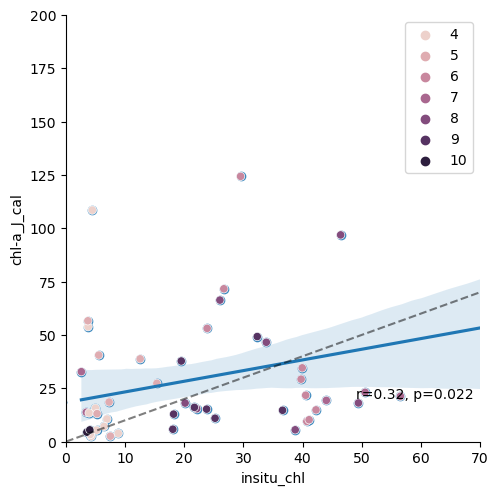

In [130]:
insi_sd_daily = sd_chla.merge(insitu_chl_daily, on='date')
insi_sd_daily = insi_sd_daily.groupby('date').median().reset_index()
insi_sd_daily['year'] = insi_sd_daily.date.dt.year
insi_sd_daily['month'] = insi_sd_daily.date.dt.month


g = sns.lmplot(data=insi_sd_daily[insi_sd_daily['chl-a_J_cal']<200], 
               x='insitu_chl', y='chl-a_J_cal', order=1)
sns.scatterplot(data=insi_sd_daily[insi_sd_daily['chl-a_J_cal']<200],
                x='insitu_chl', y='chl-a_J_cal',
                hue='month')

g.map_dataframe(annotate, x='insitu_chl', y='chl-a_J_cal', order=1)

plt.plot([0, 200], [0, 200], 'k--', alpha=0.5)
plt.ylim(0, 200)
plt.xlim(0, 70)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()


In [131]:
dalec_insi_daily

,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_J_cal_COR,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean,insitu_chl,year
0,2022-07-28,0.006881,0.005111,345.352535,161.820021,44.256417,48.032450,2.877338,30.978225,5.465,2022-07-27,1 days,5.465,5.827000,2022
1,2022-07-31,0.008219,0.005539,307.642067,172.932686,53.215789,60.712332,8.402087,38.192086,5.465,2022-07-27,4 days,5.465,6.913000,2022
2,2022-08-01,0.007481,0.005256,323.850173,168.037859,49.337332,55.114736,5.016023,35.009457,8.361,2022-08-04,3 days,8.361,7.275000,2022
3,2022-08-02,0.007381,0.004886,300.679656,175.096293,54.896474,63.186385,7.458227,39.597900,8.361,2022-08-04,2 days,8.361,7.637000,2022
4,2022-08-03,0.006902,0.004405,286.552367,179.610246,58.337357,68.338391,8.225084,42.523879,8.361,2022-08-04,1 days,8.361,7.999000,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2023-09-26,0.005212,0.004990,439.400365,137.469566,22.699486,21.850718,11.647726,16.004530,3.424,2023-09-29,3 days,3.424,4.079286,2023
92,2023-09-27,0.004661,0.004372,432.093617,139.225599,24.339290,23.580666,12.642980,16.999431,3.424,2023-09-29,2 days,3.424,3.860857,2023
93,2023-09-28,0.003415,0.003499,462.897557,131.950061,17.467749,16.685306,27.373055,13.025281,3.424,2023-09-29,1 days,3.424,3.642429,2023
94,2023-09-29,0.002448,0.002607,476.079244,128.933628,14.562360,14.070697,41.643229,11.510666,3.424,2023-09-29,0 days,3.424,3.424000,2023


In [132]:
insitu_chl_daily['year'] = insitu_chl_daily.date.dt.year

In [133]:
insitu_chl['year'] = insitu_chl.Date.dt.year

## Calibrating DALEC 2022 data using SD log-log correction is effective!

- this pulls down the 707 nm band which lowers the chl-a estimate
- this means that the DALEC data from 2022 matches well with both in-situ measurements and the SDs chl-a estimates


What does this mean?

- we are only using 2 bands in a ratio to calc. chl-a
- therefore, closely matching in-situ chl-a to Remote sensing chl-a does not neccesarily mean the spectra we're using are fully accurate
- indeed, the DALEC spectra from 2022 may be better representative, but they do suggest a different OWT, which might mean that the chl-a algorithm we're using is not suitable
- by adjusting spectra using the log-log correction, we make the spectra more suitable for the band-ratio chl-a algorithm
- none of this can explain why dalec 2022 is so different from 2023, but it does suggest that a chl-a signal is present in the 707/666 bands.


**idea**

- maybe dalec '22 and all SDs data has a stronger macrophyte, or bottom effect signal than dalec '23
- therefore, we need to adjust for this 
- but my knowledge of spectra isn't good enough to say with much certainty
- would be really good to ask Vagelis and Peter what they think is going on
    - need to prep some spectra for our next meeting.

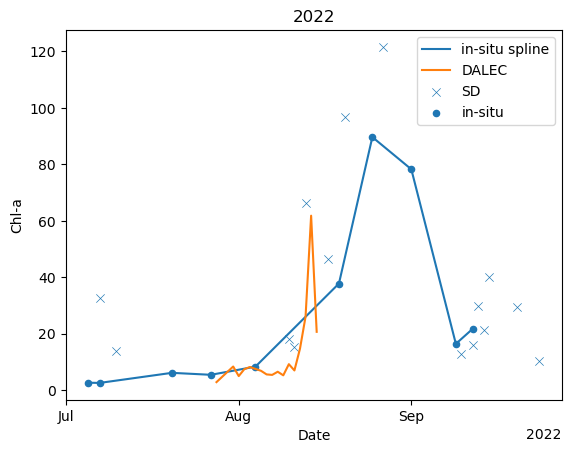

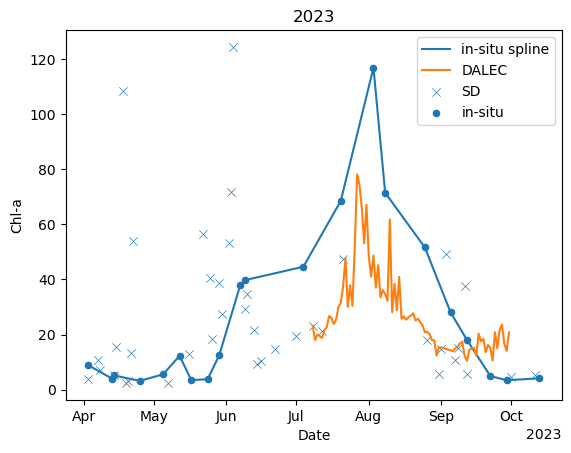

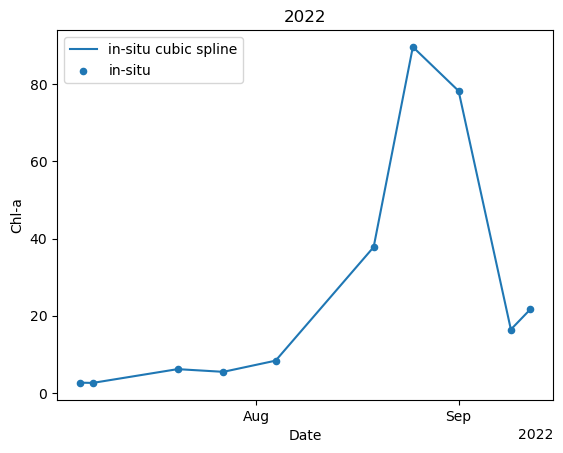

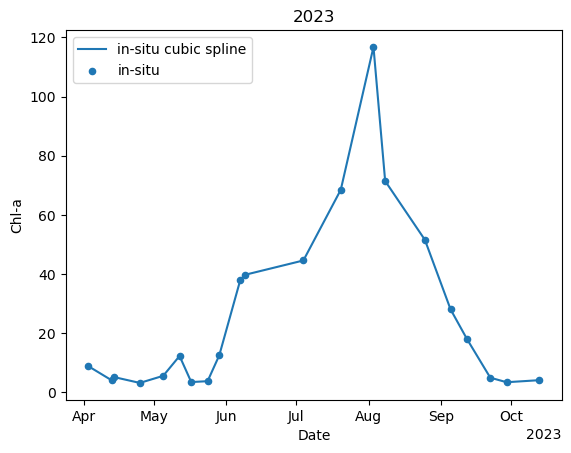

In [134]:
for year, dalec_alg in zip([2022, 2023], ['chl-a_J_cal_COR', 'chl-a_J_cal']):
    sns.lineplot(data=insitu_chl_daily[insitu_chl_daily.year==year],
                 x='date', y='insitu_chl', label='in-situ spline')
    sns.lineplot(data=dalec_insi_daily[dalec_insi_daily.date.dt.year==year], 
                 x='date', y=dalec_alg, label='DALEC')
    #g = sns.lineplot(data=insi_sd_daily[insi_sd_daily.year==year],
    #                    x='date', y='chl-a_J_cal', label='SD')
    g = sns.scatterplot(data=insi_sd_daily[insi_sd_daily.year==year],
                        x='date', y='chl-a_J_cal', marker='x', label='SD')

    insitu_chl[insitu_chl.year==year].plot(x='Date', y='Chl-a', ax=plt.gca(), kind='scatter', label='in-situ')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(4, 5, 6, 7, 8, 9, 10)))
    plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.legend(loc='upper right')
    plt.gca().set_title(str(year))
    #plt.yscale('log')
    plt.show()
    
for year in [2022, 2023]:
    #g = sns.scatterplot(data=insi_sd_daily[insi_sd_daily.year==year],
    #                    x='date', y='chl-a_J_cal', marker='x', label='SD')
    sns.lineplot(data=insitu_chl_daily[insitu_chl_daily.year==year],
                 x='date', y='insitu_chl', label='in-situ cubic spline')
    #sns.lineplot(data=dalec_insi_daily[dalec_insi_daily.date.dt.year==year], 
    #             x='date', y='chl-a_J_cal', label='DALEC')

    insitu_chl[insitu_chl.year==year].plot(x='Date', y='Chl-a', ax=plt.gca(), kind='scatter', label='in-situ')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(4, 5, 6, 7, 8, 9, 10)))
    plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.legend()
    plt.gca().set_title(str(year))
    plt.show()

# Where am I at now?

- adjusting superdoves to match planet more closely using log-log regression has been pretty effective! 
- with the current chl-a algorithm (J_cal), I'm finding that we get a significant regression line, despite a few possibly spurious outliers
- probably need to investigate these outliers more closely and work out if there's something we can do about them?
    - there may be some cases where the outlier is actually a fairly good measurement showing something that the interpolation has smoothed over (eg. data gap in mid-June 2023, or Aug 2022)
    - some points do look spurious though - early June 2023
        - I have a note saying that there were large concs of windblown debris (algal and other floral) on the 7th of June.
        - possibly this could explain these really high values

In [68]:
insi_sd_daily[insi_sd_daily.date.dt.month==6]

,date,Date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean,insitu_chl,year,month
32,2023-06-02,2023-06-02 10:28:55+00:00,0.012317,0.006329,204.955161,210.224605,79.470617,53.076842,61.731231,12.530,2023-05-29,4 days,12.530,23.790721,2023,6
33,2023-06-03,2023-06-03 10:29:51+00:00,0.023349,0.013297,242.722607,194.892947,69.350073,71.631729,52.286171,38.008,2023-06-07,4 days,38.008,26.582915,2023,6
34,2023-06-04,2023-06-04 10:26:56+00:00,0.024873,0.011169,160.503183,232.892982,92.910043,124.351111,74.874283,38.008,2023-06-07,3 days,38.008,29.322110,2023,6
35,2023-06-09,2023-06-09 11:08:06+00:00,0.016255,0.010832,303.274264,174.285499,54.269052,29.258068,39.071257,39.744,2023-06-09,0 days,39.744,39.744000,2023,6
36,2023-06-10,2023-06-10 10:31:16+00:00,0.013078,0.007778,259.266253,188.867139,65.122722,34.560474,48.470796,39.744,2023-06-09,1 days,39.744,42.476774,2023,6
37,2023-06-13,2023-06-13 10:25:48.500000+00:00,0.010251,0.006313,270.205683,185.259319,62.430249,21.727549,46.140198,39.744,2023-06-09,4 days,39.744,46.384017,2023,6
38,2023-06-14,2023-06-14 11:22:14+00:00,0.010329,0.007371,329.870749,166.266784,47.907753,9.452895,33.858886,39.744,2023-06-09,5 days,39.744,47.333796,2023,6
39,2023-06-16,2023-06-16 10:27:59.500000+00:00,0.007099,0.004424,277.218907,182.693274,60.636287,10.230036,44.513823,39.744,2023-06-09,7 days,NaN,48.758617,2023,6
40,2023-06-22,2023-06-22 11:07:43+00:00,0.012486,0.008795,324.822985,167.750026,49.105952,14.857433,34.822392,44.595,2023-07-04,12 days,NaN,49.885749,2023,6


In [69]:
Rrs_708_666 = sds_med[sds_med.Wavelength==707.0].Rrs_sd.values / sds_med[sds_med.Wavelength==666.0].Rrs_sd.values

In [70]:
ratio_df = pd.DataFrame(data={'Date':sds_med[sds_med.Wavelength==707.0].Date,
                              'date':sds_med[sds_med.Wavelength==707.0].date, 
                              'Rrs_708_666':Rrs_708_666})
ratio_df

,Date,date,Rrs_708_666
6,2022-04-19 10:47:11+00:00,2022-04-19,1.578683
14,2022-04-19 10:47:13+00:00,2022-04-19,1.631935
22,2022-04-23 10:26:57+00:00,2022-04-23,2.132610
30,2022-04-23 10:26:59+00:00,2022-04-23,2.131413
38,2022-04-24 11:16:56+00:00,2022-04-24,1.486303
...,...,...,...
822,2023-09-11 10:30:46+00:00,2023-09-11,1.562393
830,2023-09-12 10:32:01+00:00,2023-09-12,1.348111
838,2023-09-12 11:11:16+00:00,2023-09-12,1.148686
846,2023-10-01 11:10:51+00:00,2023-10-01,1.560670


In [71]:
sd_chla

,Date,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean
0,2022-04-19 10:47:11+00:00,2022-04-19,0.009290,0.005885,283.588498,180.579715,59.064919,15.604604,43.150545,2.663,2022-07-05,77 days,NaN
1,2022-04-19 10:47:13+00:00,2022-04-19,0.007516,0.004606,270.749518,184.877164,62.242031,12.704134,45.918460,2.663,2022-07-05,77 days,NaN
2,2022-04-23 10:26:57+00:00,2022-04-23,0.005446,0.002554,173.913865,225.281610,88.586724,28.304408,70.577450,2.663,2022-07-05,73 days,NaN
3,2022-04-23 10:26:59+00:00,2022-04-23,0.005374,0.002521,174.093868,225.185032,88.530680,27.723192,70.522163,2.663,2022-07-05,73 days,NaN
4,2022-04-24 11:16:56+00:00,2022-04-24,0.007158,0.004816,307.019422,173.124622,53.365714,6.187189,38.316851,2.663,2022-07-05,72 days,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2023-09-11 10:30:46+00:00,2023-09-11,0.017587,0.011256,287.613580,179.265089,58.077354,37.772731,42.300597,18.055,2023-09-12,1 days,18.055
103,2023-09-12 10:32:01+00:00,2023-09-12,0.011000,0.008159,344.812706,161.972586,44.383165,8.390687,31.076781,18.055,2023-09-12,0 days,18.055
104,2023-09-12 11:11:16+00:00,2023-09-12,0.011789,0.010263,405.149121,145.878926,30.436652,3.192101,20.928552,18.055,2023-09-12,0 days,18.055
105,2023-10-01 11:10:51+00:00,2023-10-01,0.005363,0.003436,288.041913,179.126065,57.972485,4.422178,42.210638,3.424,2023-09-29,2 days,3.424


<Axes: xlabel='date', ylabel='chl-a_J_cal'>

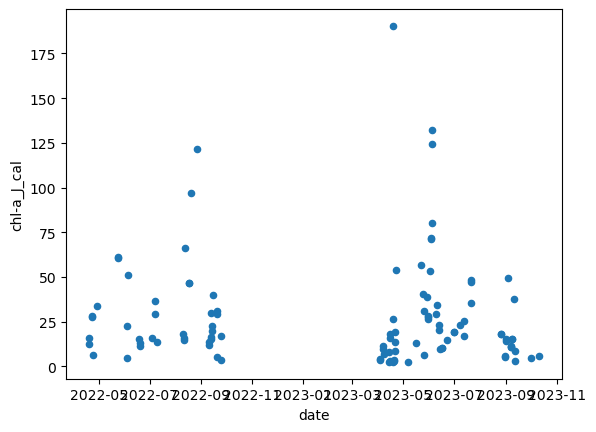

In [72]:
sd_chla.plot(x='date', y='chl-a_J_cal', kind='scatter')